# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 15.5 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('b3e37289.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-05-03T14:38:05.461561Z   
1  2020-05-03T14:38:05.473622Z   
2  2020-05-03T14:38:05.484953Z   
3  2020-05-03T14:38:05.495150Z   
4  2020-05-03T14:38:05.505052Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 2469, 'deaths': 72, 'recovered': 0}   
1   {'confirmed': 789, 'deaths': 31, 'recovered': 0}   
2  {'confirmed': 4295, 'deaths': 459, 'recovered'...   
3   {'confirmed': 747, 'deaths': 44, 'recovered': 0}   
4     {'confirmed': 35, 'deaths': 2, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 2469, 'timeline': {'2...  
1  {'confirmed': {'latest': 789, 'timeline': {'20...  
2  {'confirmed': {'latest': 4295, 'timeline': {'2...  
3  {'confirmed': {'latest': 747, 'timeline': {'20...  
4  {'confirmed': {'latest': 35, 'timeline': {'202...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
97       10761     246       NaN                     0.083705   
98       10765     247       NaN                     0.037171   
99       10774     248       NaN                     0.083604   
100      10780     250       NaN                     0.055690   
101      10793     250       NaN                     0.120594   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
97                                          243.765592                 
98                                          108.249652                 
99                                          243.471217                 
100                                         162.178556                 
101                                         351.191295                 

     deaths_percentage_change  \
97                   0.819672   
98                   0.406504   
99                   0.404858   
100                  0.806452   
101                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
97                                         2387.037930           
98                                         1183.815559           
99                                         1179.022783           
100                                        2348.537318           
101                                                NaN           

     confirmed_new_cases  deaths_new_cases  
97                   9.0               2.0  
98                   4.0               1.0  
99                   9.0               1.0  
100                  6.0               2.0  
101                 13.0               NaN

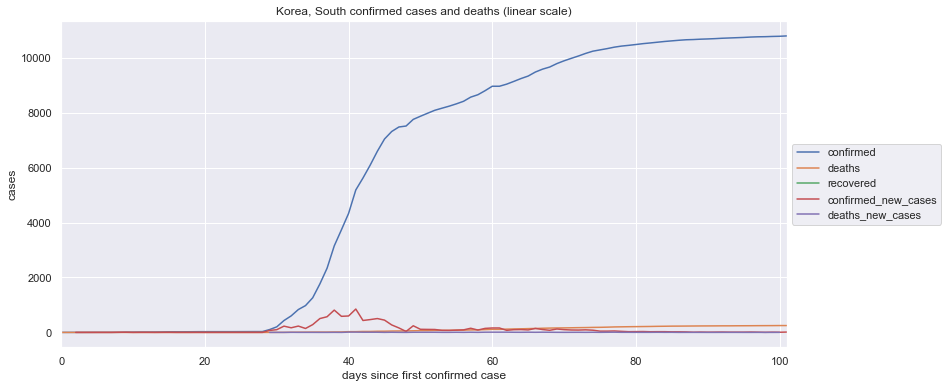

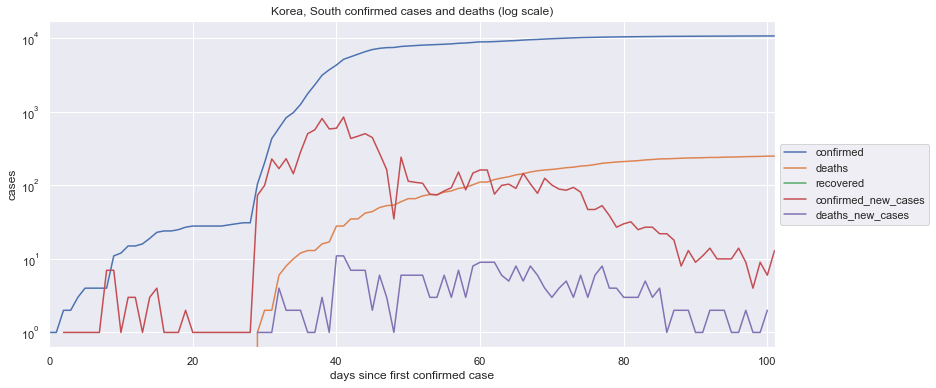

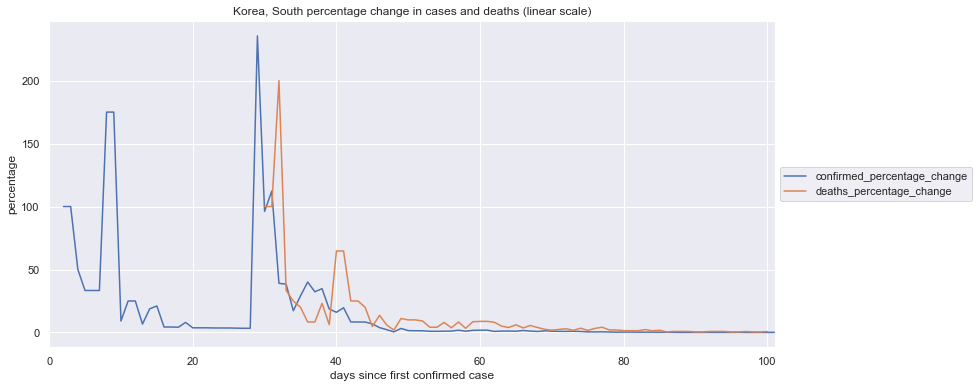

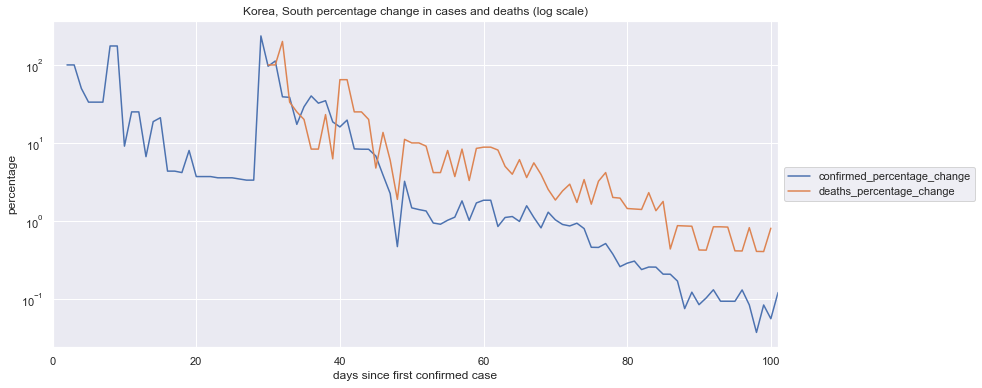

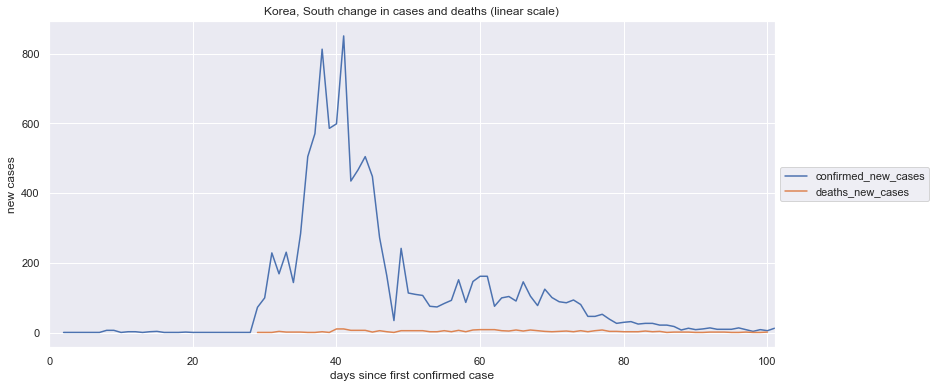

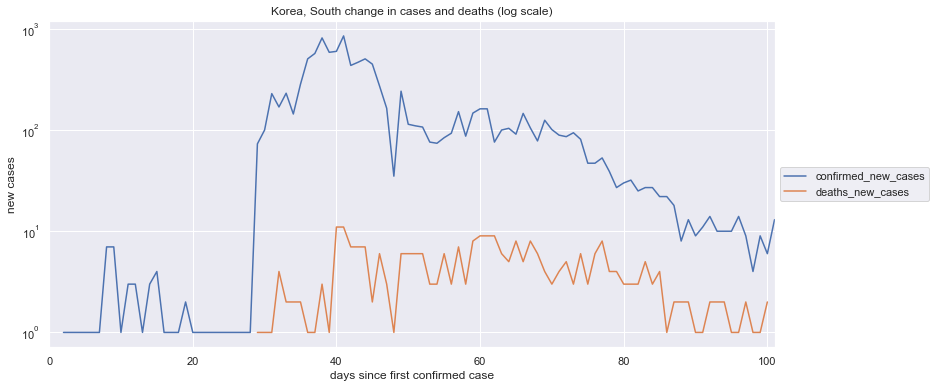

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
84      47334    7331       NaN                     1.385825   
85      47859    7501       NaN                     1.109139   
86      48519    7594       NaN                     1.379051   
87      49032    7703       NaN                     1.057318   
88      49517    7765       NaN                     0.989150   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
84                                        8024.176640                 
85                                        6422.117760                 
86                                        7984.955193                 
87                                        6122.061551                 
88                                        5727.357574                 

    deaths_percentage_change  \
84                  1.720549   
85                  2.318920   
86                  1.239835   
87                  1.435344   
88                  0.804881   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
84                                        9962.293467           
85                                       13426.965398           
86                                        7178.867720           
87                                        8310.900311           
88                                        4660.408219           

    confirmed_new_cases  deaths_new_cases  
84                647.0             124.0  
85                525.0             170.0  
86                660.0              93.0  
87                513.0             109.0  
88                485.0              62.0

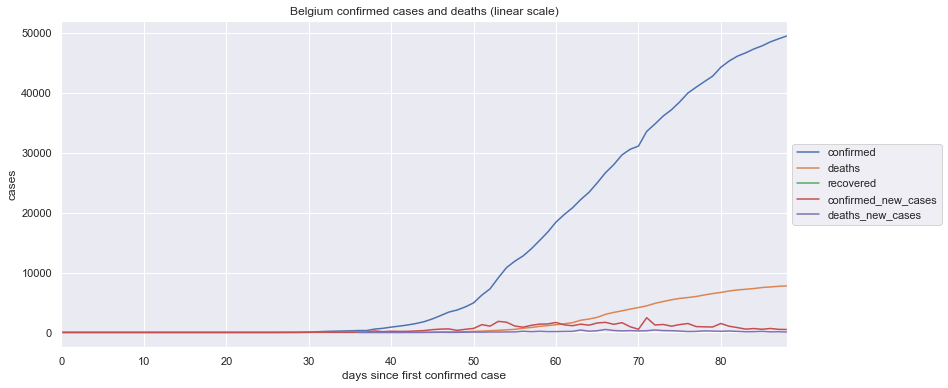

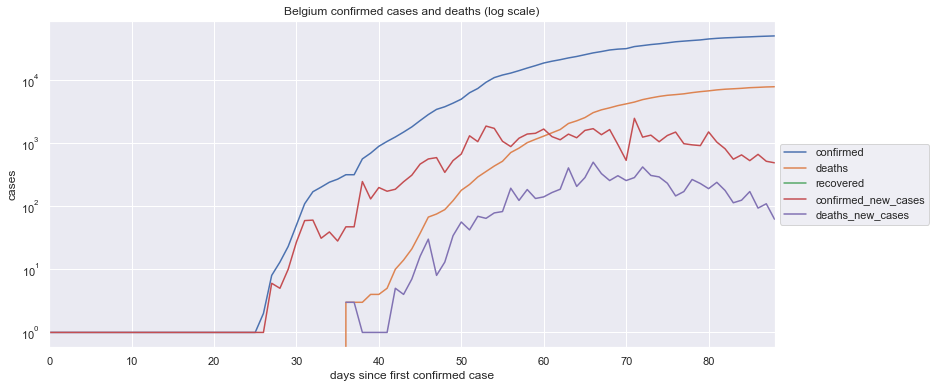

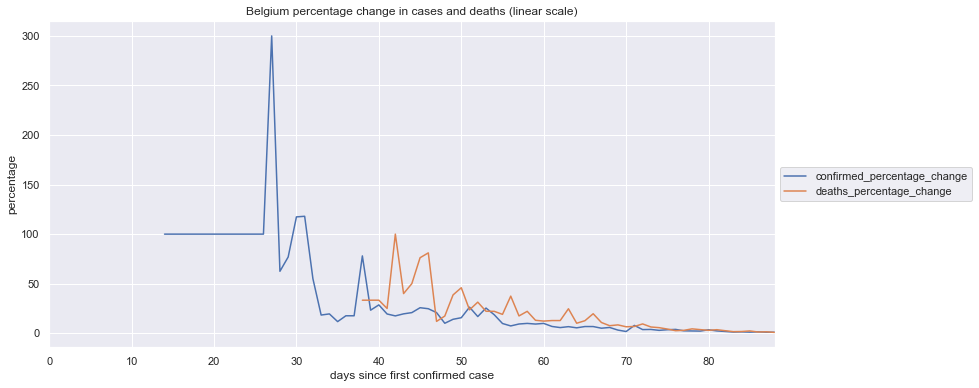

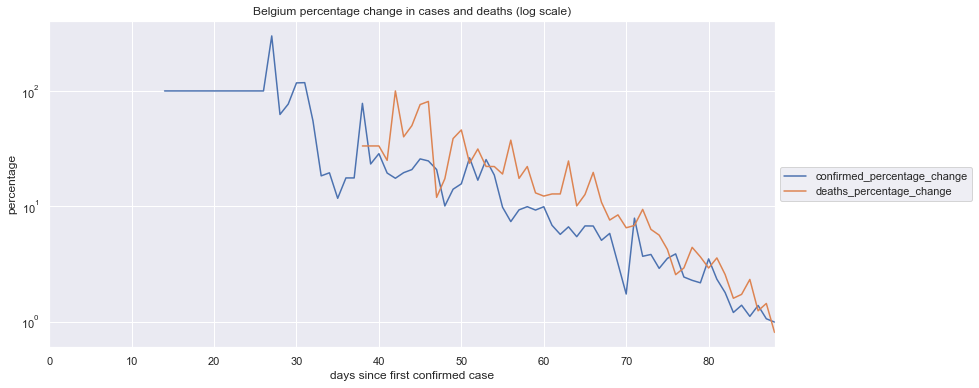

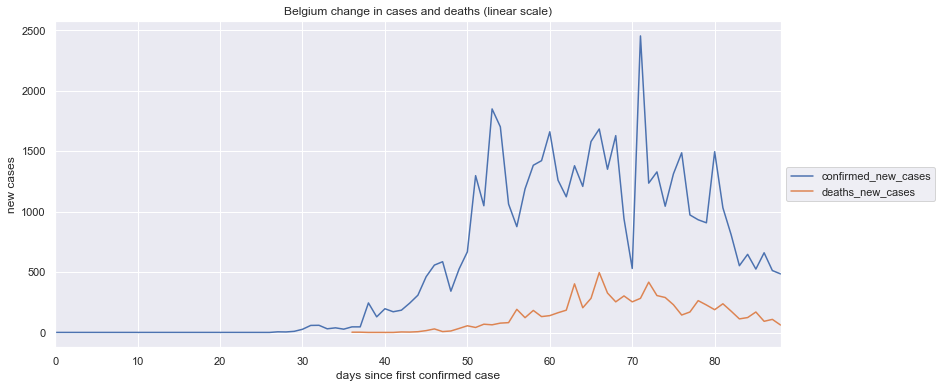

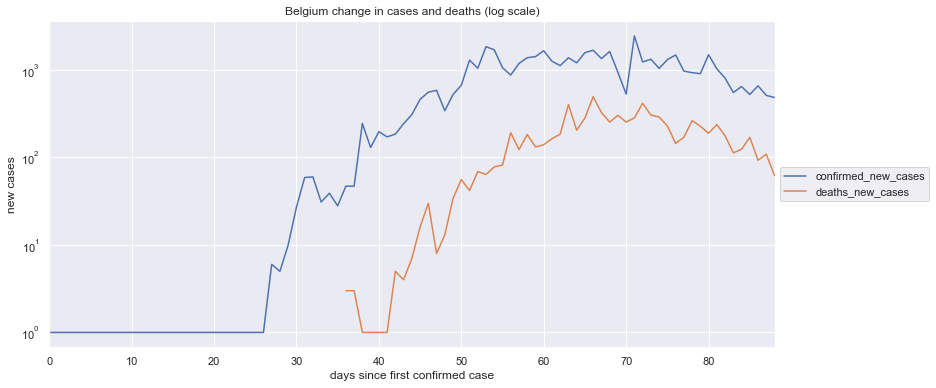

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
63      29264    1699       NaN                     0.342888   
64      29407    1716       NaN                     0.488655   
65      29586    1737       NaN                     0.608699   
66      29705    1754       NaN                     0.402217   
67      29817    1762       NaN                     0.377041   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
63                                        1651.440064                 
64                                        2353.489448                 
65                                        2931.650644                 
66                                        1937.182845                 
67                                        1815.926942                 

    deaths_percentage_change  \
63                  2.042042   
64                  1.000589   
65                  1.223776   
66                  0.978699   
67                  0.456100   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
63                                        9835.005005           
64                                        4819.094565           
65                                        5894.024236           
66                                        4713.668202           
67                                        2196.697744           

    confirmed_new_cases  deaths_new_cases  
63                100.0              34.0  
64                143.0              17.0  
65                179.0              21.0  
66                119.0              17.0  
67                112.0               8.0

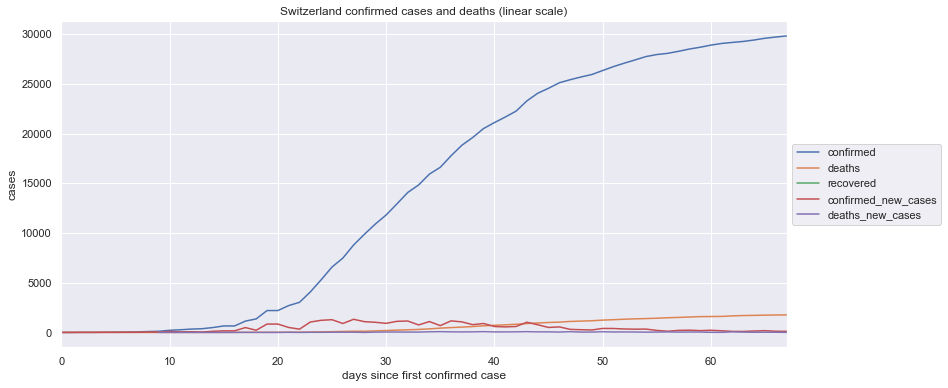

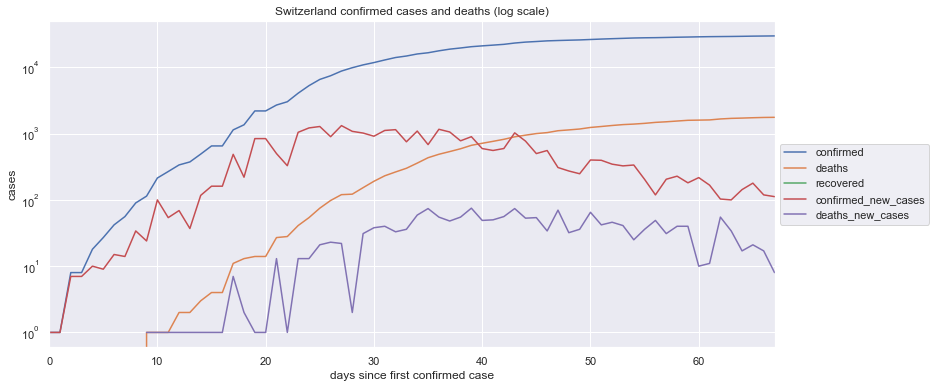

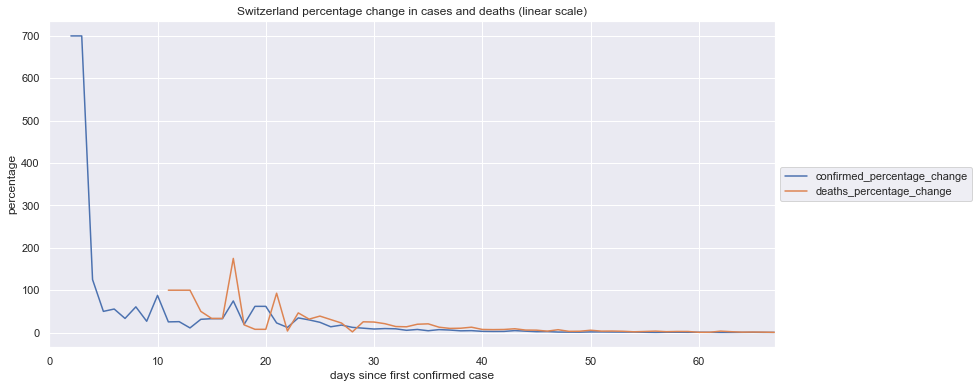

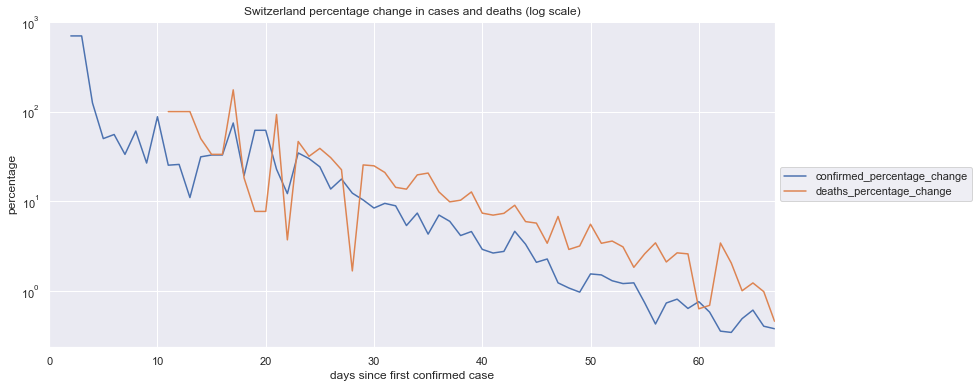

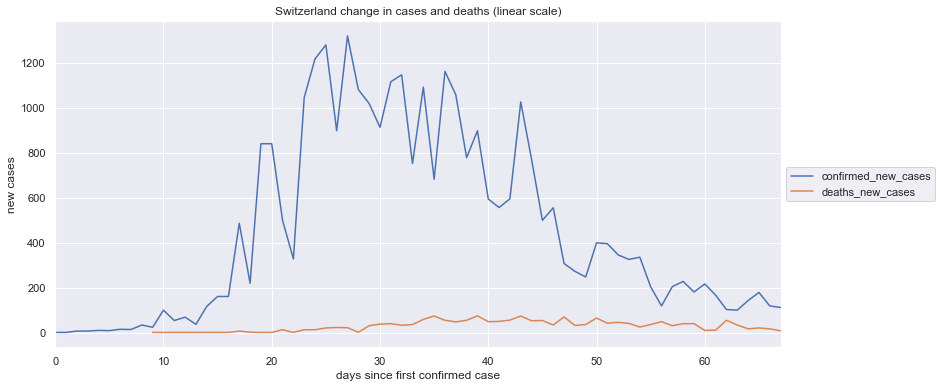

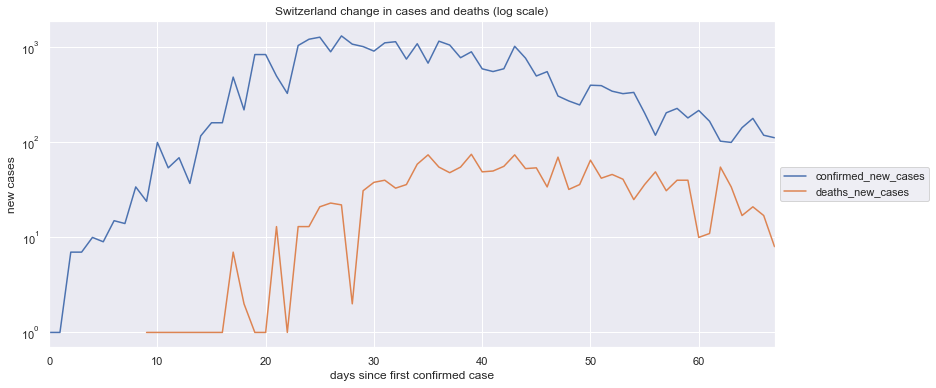

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
62       2566     138       NaN                     1.262826   
63       2576     139       NaN                     0.389712   
64       2591     140       NaN                     0.582298   
65       2612     140       NaN                     0.810498   
66       2620     143       NaN                     0.306279   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
62                                         513.536685                 
63                                         158.478902                 
64                                         236.795533                 
65                                         329.594524                 
66                                         124.550341                 

    deaths_percentage_change  \
62                  1.470588   
63                  0.724638   
64                  0.719424   
65                  0.719424   
66                  2.142857   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
62                                         598.024798           
63                                         294.678886           
64                                         292.558894           
65                                         292.558894           
66                                         871.407563           

    confirmed_new_cases  deaths_new_cases  
62                 32.0               2.0  
63                 10.0               1.0  
64                 15.0               1.0  
65                 21.0               1.0  
66                  8.0               3.0

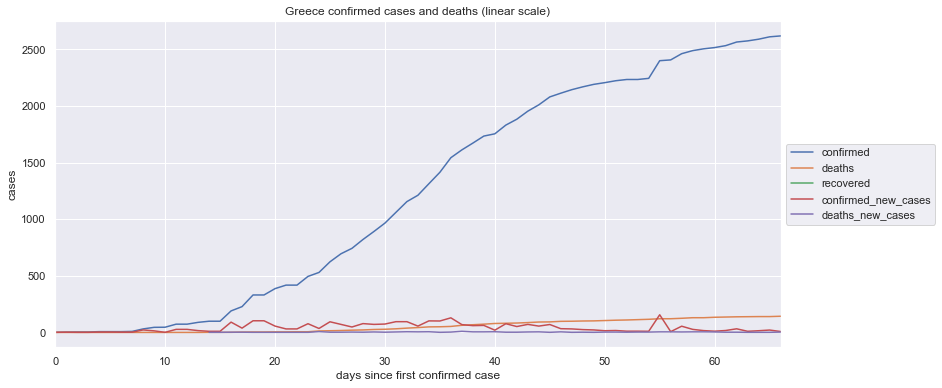

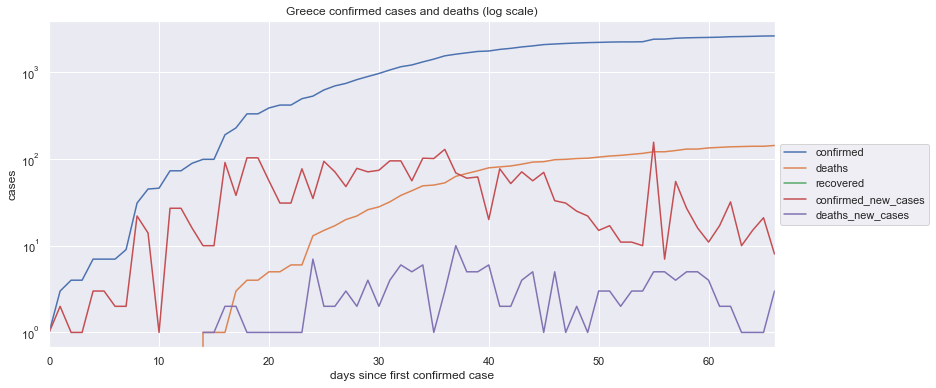

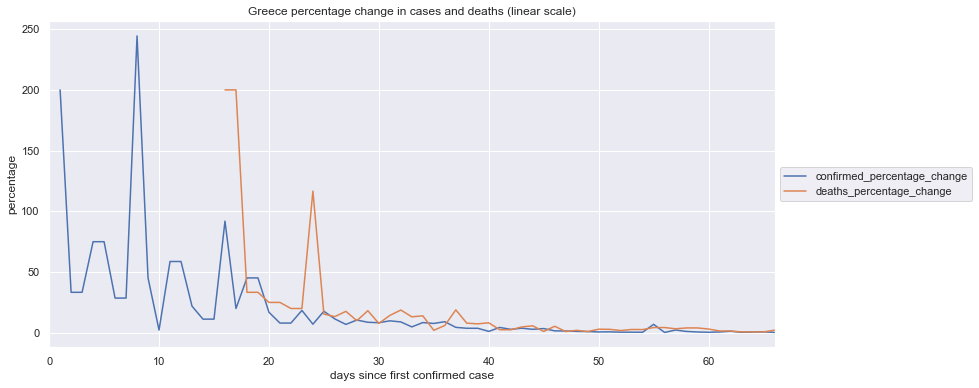

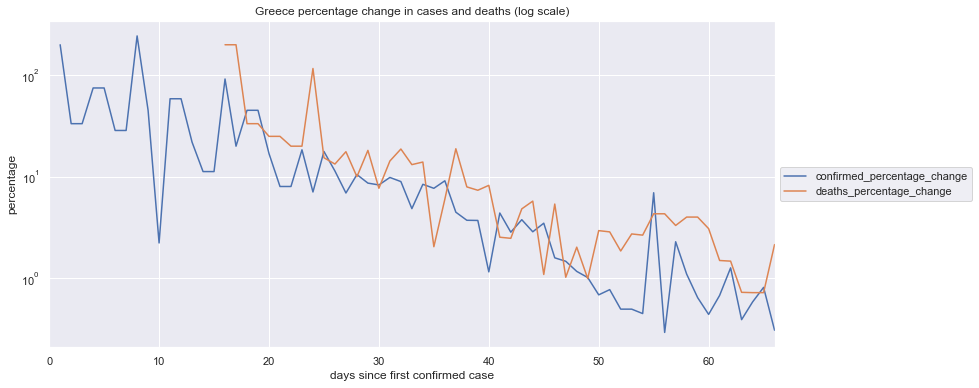

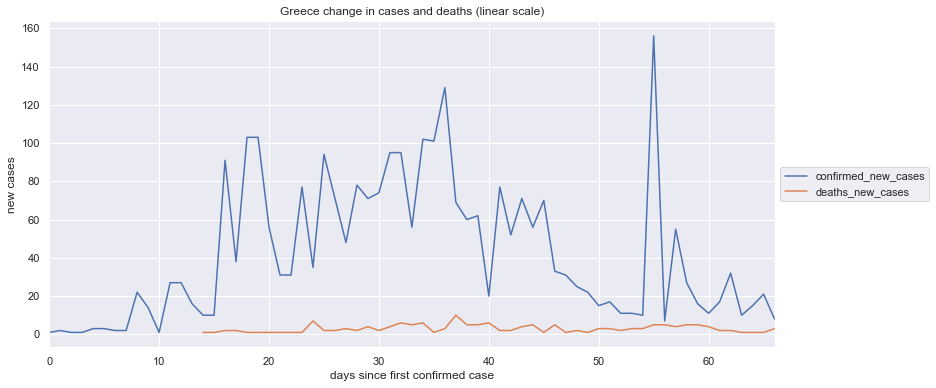

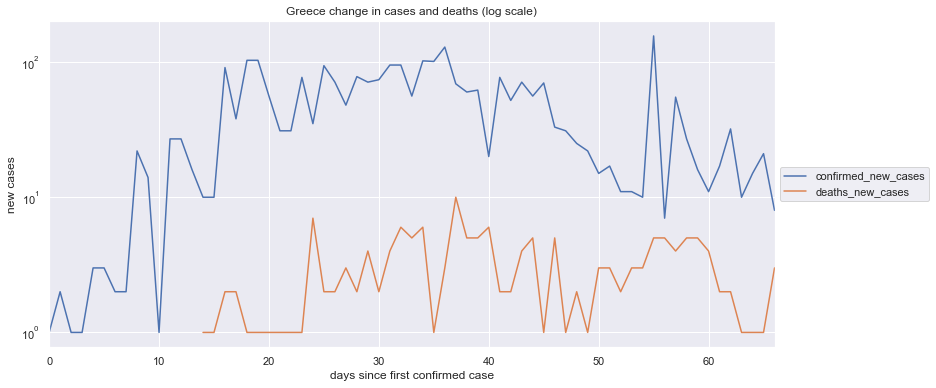

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
62       7660     206       NaN                     0.802737   
63       7710     207       NaN                     0.652742   
64       7738     210       NaN                     0.363165   
65       7783     210       NaN                     0.581546   
66       7809     211       NaN                     0.334061   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
62                                        1052.101218                 
63                                         855.510546                 
64                                         475.978993                 
65                                         762.198204                 
66                                         437.834975                 

    deaths_percentage_change  \
62                  0.487805   
63                  0.485437   
64                  1.449275   
65                  1.449275   
66                  0.476190   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
62                                         639.337637           
63                                         636.234057           
64                                        1899.481387           
65                                        1899.481387           
66                                         624.115313           

    confirmed_new_cases  deaths_new_cases  
62                 61.0               1.0  
63                 50.0               1.0  
64                 28.0               3.0  
65                 45.0               3.0  
66                 26.0               1.0

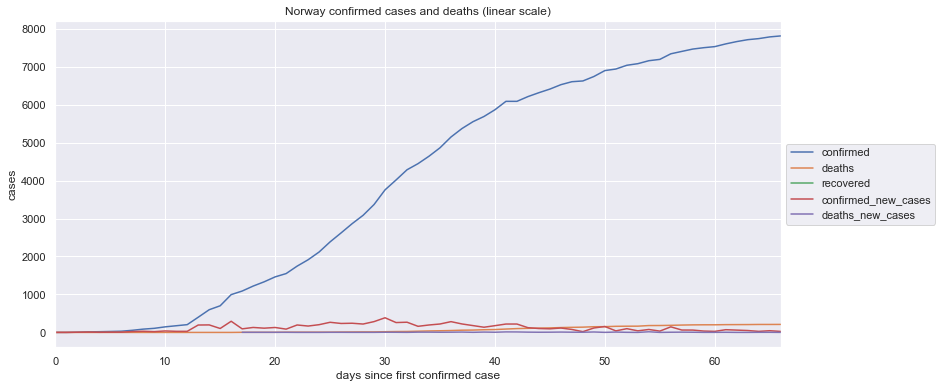

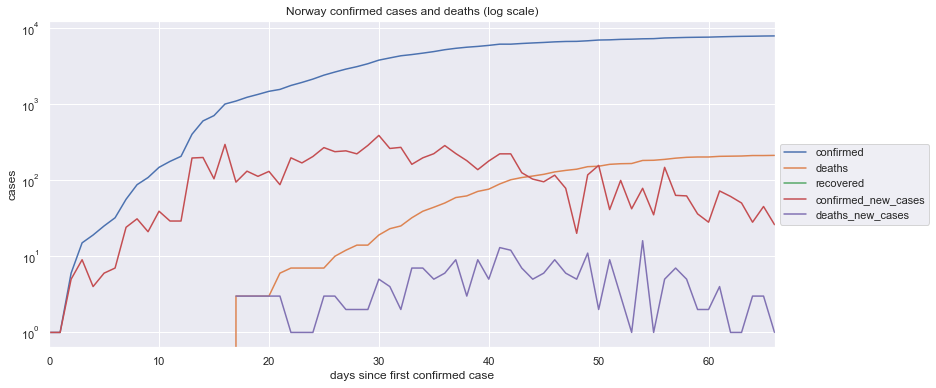

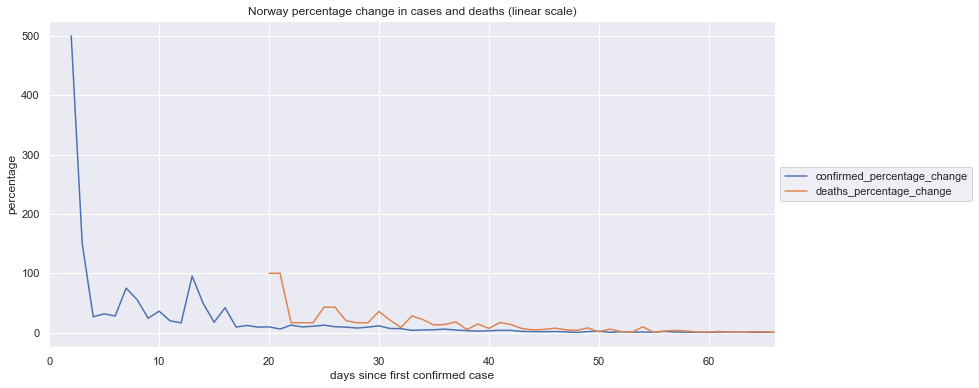

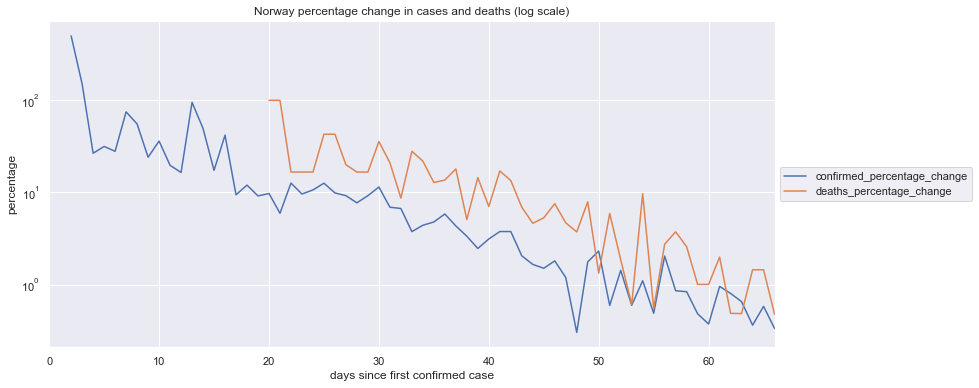

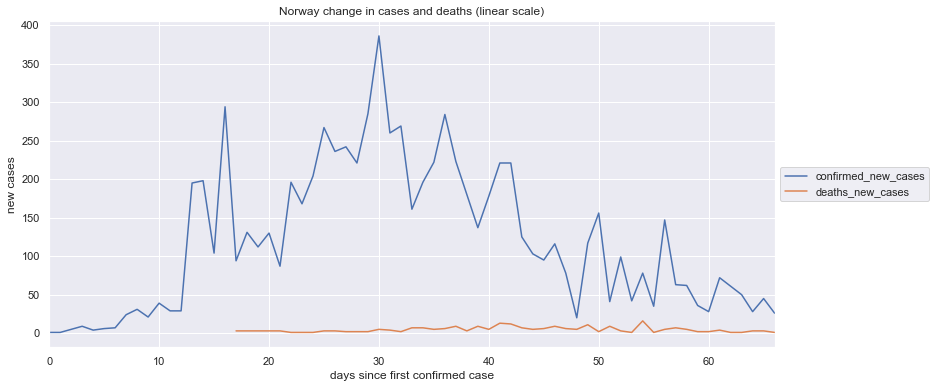

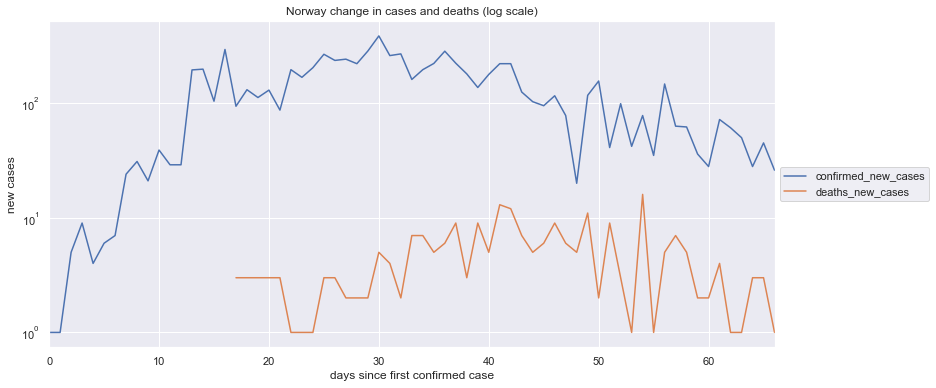

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
63      15357     569       NaN                     0.543407   
64      15402     580       NaN                     0.293026   
65      15452     584       NaN                     0.324633   
66      15531     589       NaN                     0.511261   
67      15558     596       NaN                     0.173846   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
63                                        1420.189121                 
64                                         765.820530                 
65                                         848.425593                 
66                                        1336.174770                 
67                                         454.344442                 

    deaths_percentage_change  \
63                  3.642987   
64                  1.933216   
65                  0.689655   
66                  0.856164   
67                  1.188455   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
63                                        9520.911461           
64                                        5052.441504           
65                                        1802.407032           
66                                        2237.577223           
67                                        3106.015513           

    confirmed_new_cases  deaths_new_cases  
63                 83.0              20.0  
64                 45.0              11.0  
65                 50.0               4.0  
66                 79.0               5.0  
67                 27.0               7.0

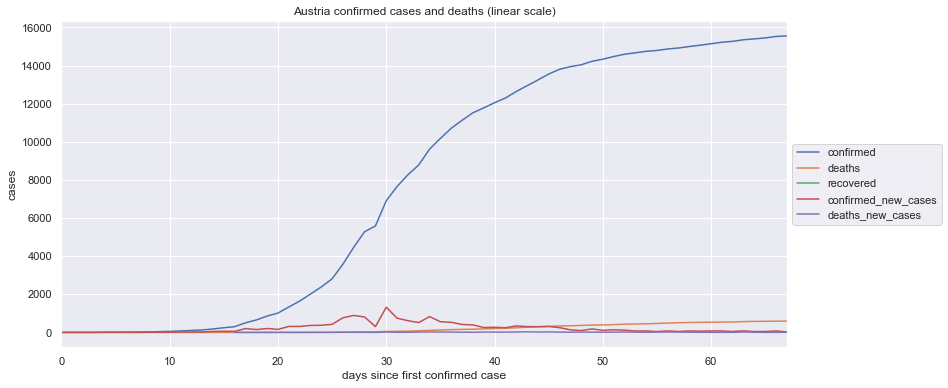

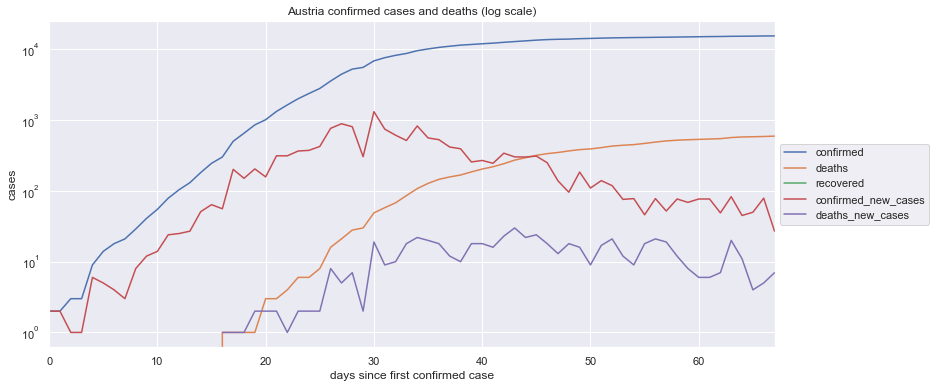

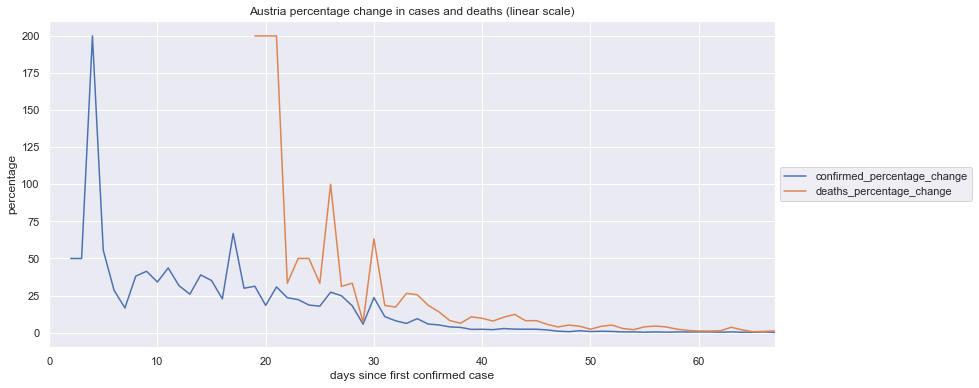

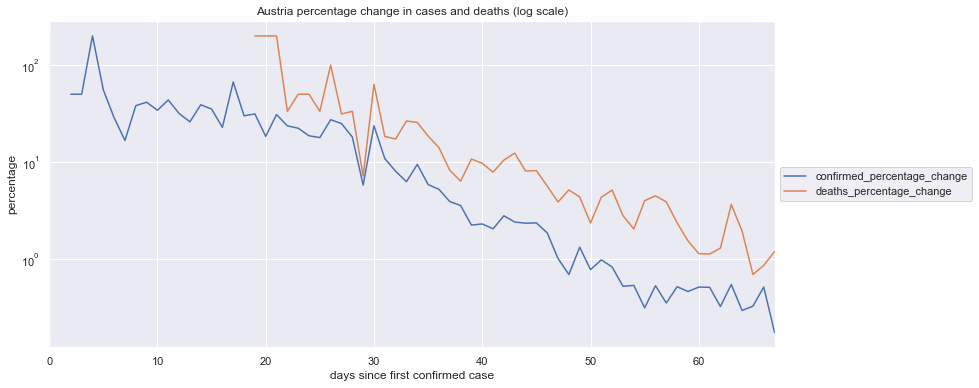

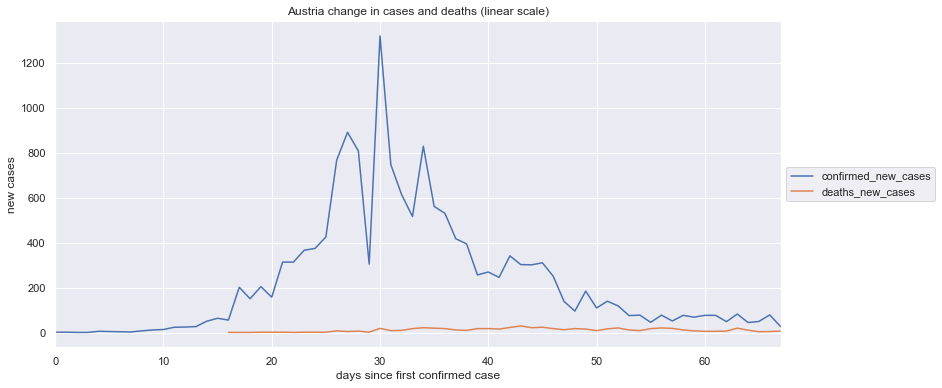

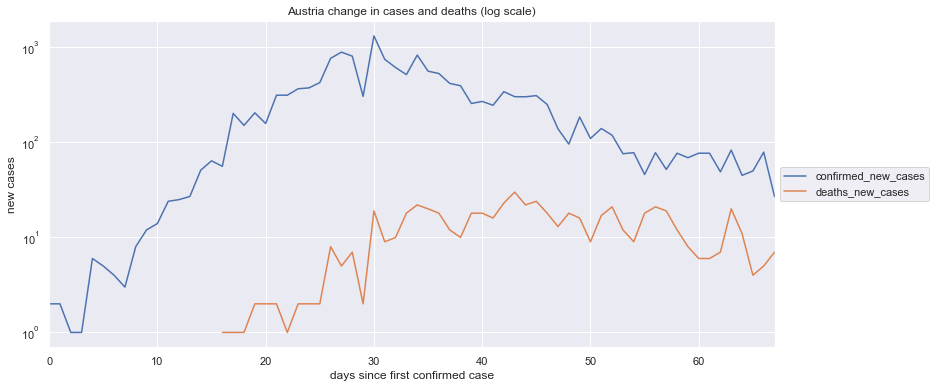

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
88      19621    2355       NaN                     3.672197   
89      20302    2462       NaN                     3.470771   
90      21092    2586       NaN                     3.891242   
91      21520    2653       NaN                     2.029205   
92      22082    2669       NaN                     2.611524   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
88                                        8382.797656                 
89                                        7922.987825                 
90                                        8882.828602                 
91                                        4632.218330                 
92                                        5961.520792                 

    deaths_percentage_change  \
88                  3.562005   
89                  4.543524   
90                  5.036556   
91                  2.590874   
92                  0.603091   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
88                                        8131.254850           
89                                       10371.841722           
90                                       11497.320845           
91                                        5914.380981           
92                                        1376.720398           

    confirmed_new_cases  deaths_new_cases  
88                695.0              81.0  
89                681.0             107.0  
90                790.0             124.0  
91                428.0              67.0  
92                562.0              16.0

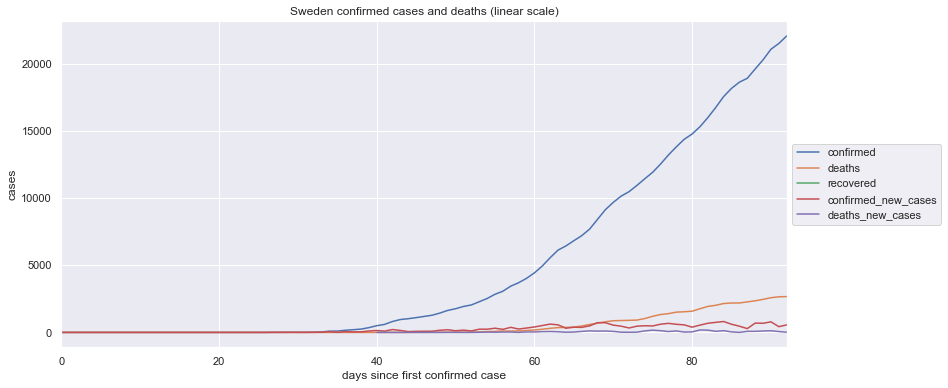

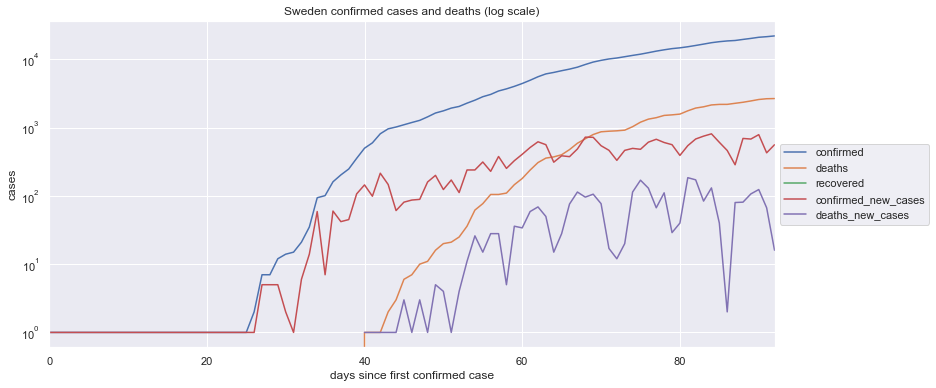

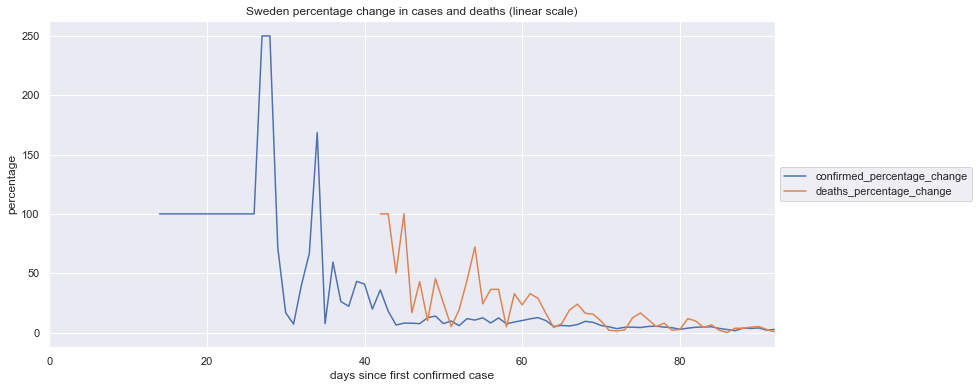

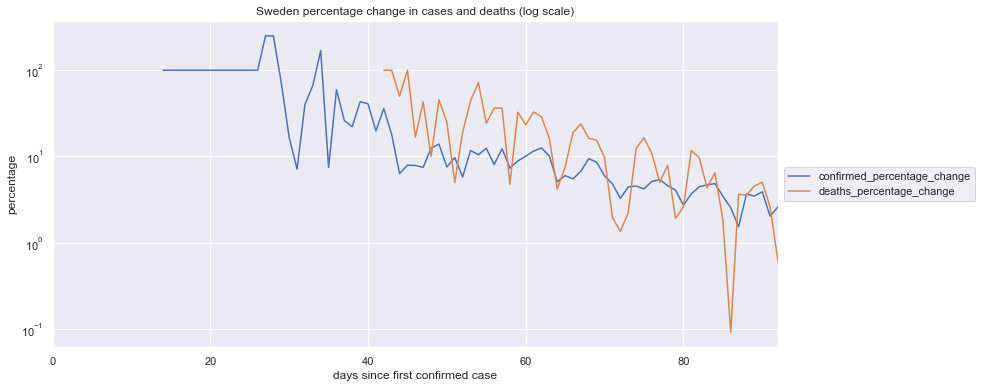

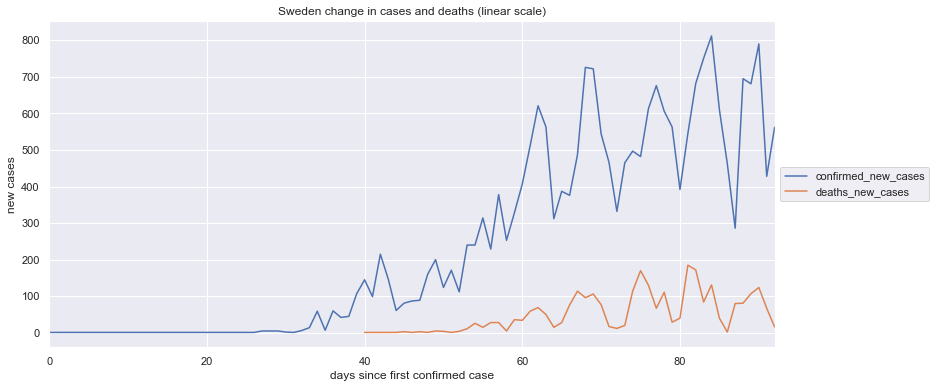

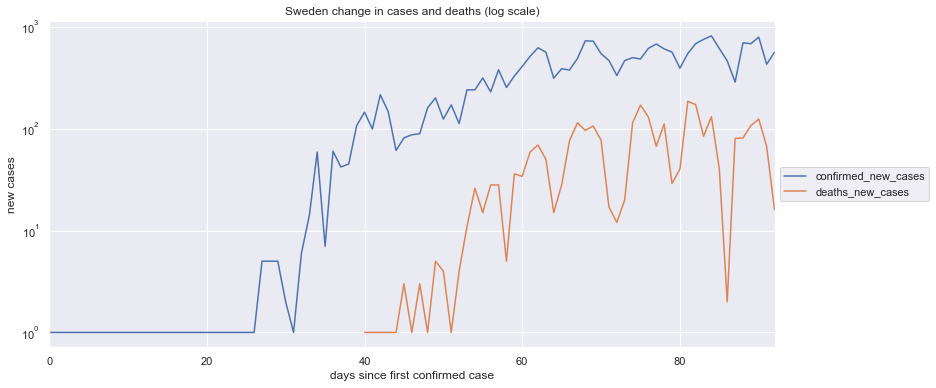

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
59      19877    1159       NaN                     1.165513   
60      20253    1190       NaN                     1.891634   
61      20612    1232       NaN                     1.772577   
62      20833    1265       NaN                     1.072191   
63      21176    1286       NaN                     1.646426   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
59                                        2463.448907                 
60                                        3998.190045                 
61                                        3746.549821                 
62                                        2266.201727                 
63                                        3479.915773                 

    deaths_percentage_change  \
59                  5.172414   
60                  2.674720   
61                  3.529412   
62                  2.678571   
63                  1.660079   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
59                                       10932.505071           
60                                        5653.334518           
61                                        7459.826990           
62                                        5661.475840           
63                                        3508.772379           

    confirmed_new_cases  deaths_new_cases  
59                229.0              57.0  
60                376.0              31.0  
61                359.0              42.0  
62                221.0              33.0  
63                343.0              21.0

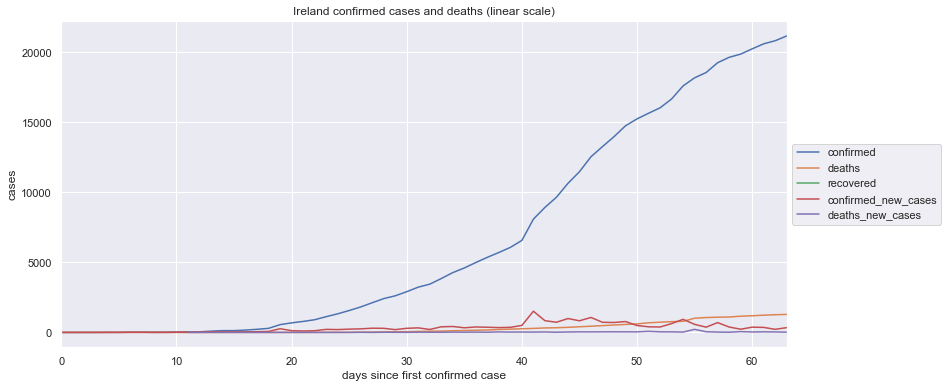

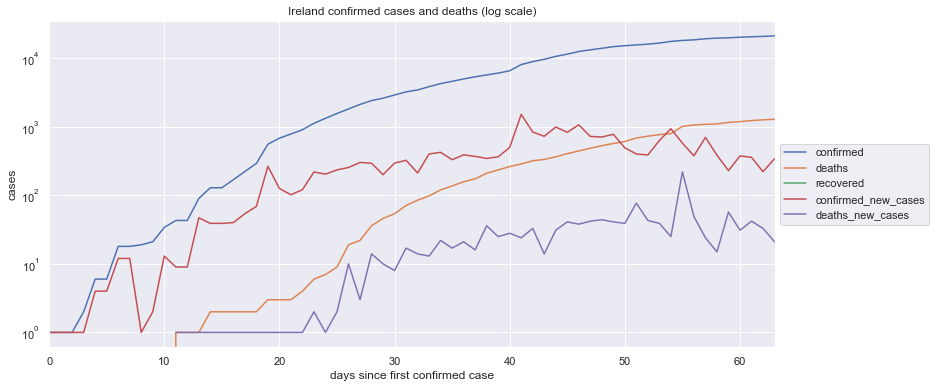

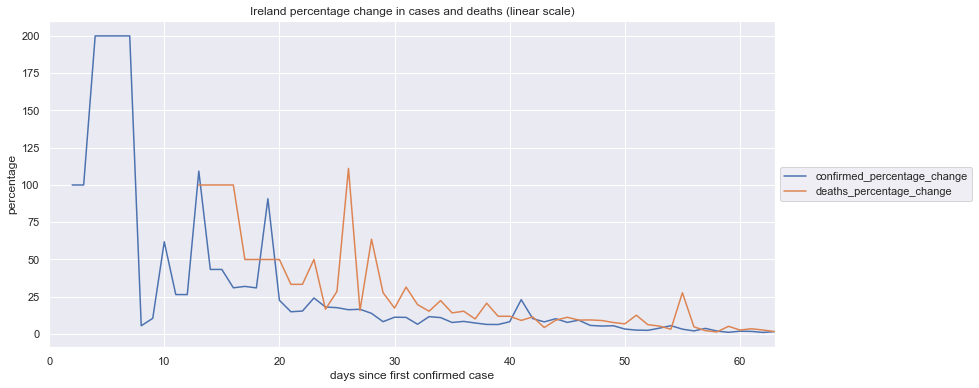

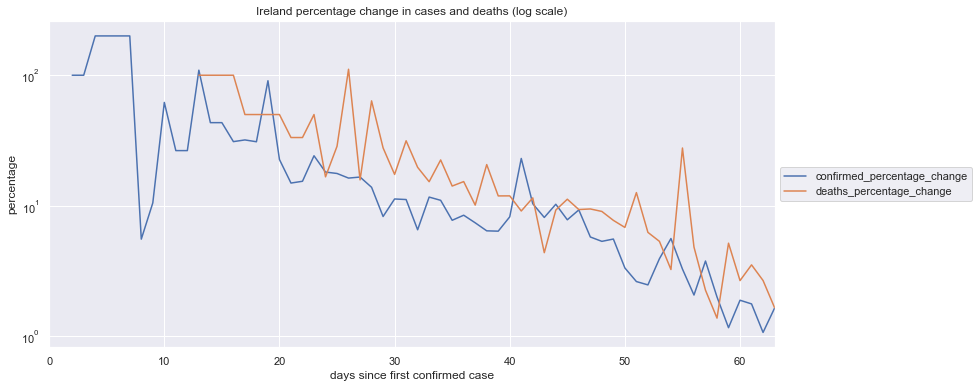

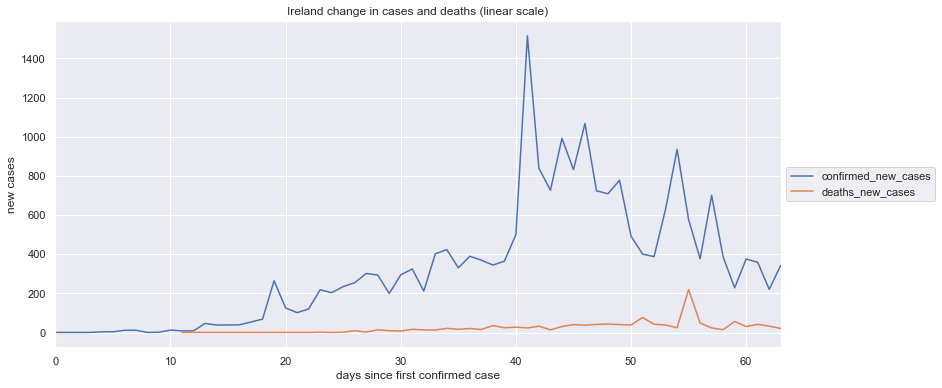

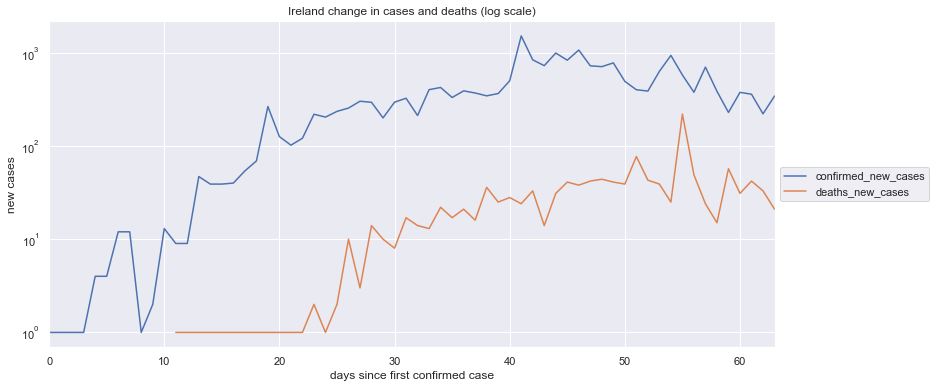

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
88     161145   25302       NaN                     2.542810   
89     165221   26097       NaN                     2.529399   
90     171253   26771       NaN                     3.650868   
91     177454   27510       NaN                     3.620958   
92     182260   28131       NaN                     2.708308   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
88                                       44076.315284                 
89                                       43843.858126                 
90                                       63283.065641                 
91                                       62764.629044                 
92                                       46945.005731                 

    deaths_percentage_change  \
88                  3.726479   
89                  3.142044   
90                  2.582672   
91                  2.760450   
92                  2.257361   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
88                                       64593.689366           
89                                       54463.268423           
90                                       44767.282694           
91                                       47848.823903           
92                                       39128.430945           

    confirmed_new_cases  deaths_new_cases  
88               3996.0             909.0  
89               4076.0             795.0  
90               6032.0             674.0  
91               6201.0             739.0  
92               4806.0             621.0

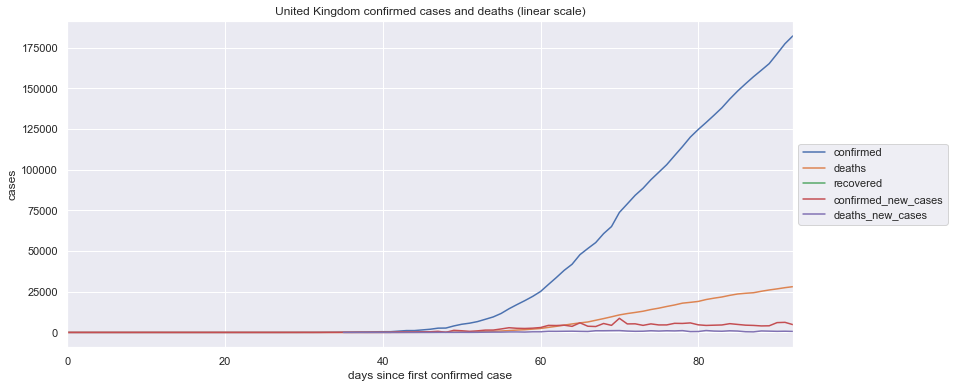

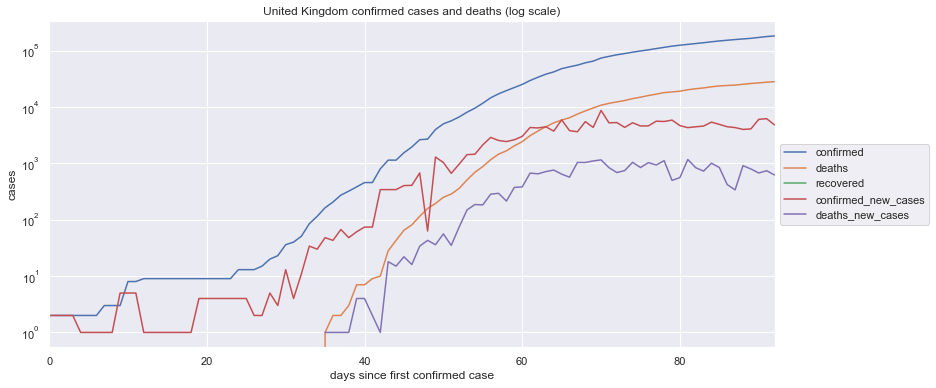

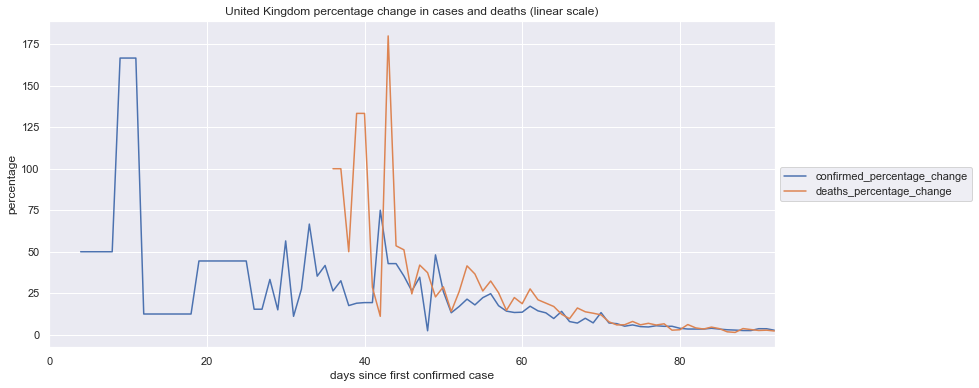

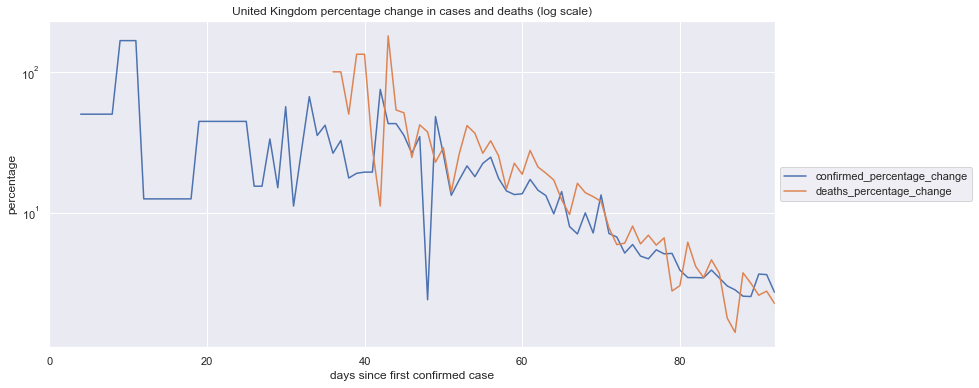

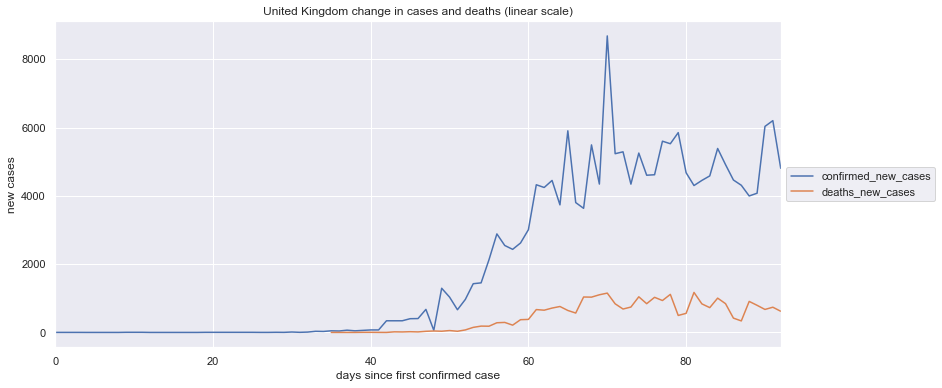

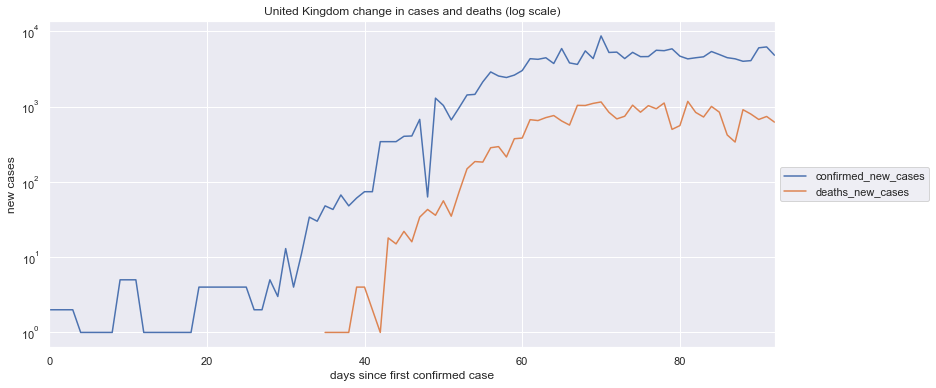

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
92     159912    6314       NaN                     0.726893   
93     161539    6467       NaN                     1.017435   
94     163009    6623       NaN                     0.909997   
95     164077    6736       NaN                     0.655179   
96     164967    6812       NaN                     0.542428   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
92                                       17319.735371                 
93                                       24242.508714                 
94                                       21682.582480                 
95                                       15611.000295                 
96                                       12924.488437                 

    deaths_percentage_change  \
92                  3.068887   
93                  2.423187   
94                  2.412247   
95                  1.706175   
96                  1.128266   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
92                                       73122.649523           
93                                       57737.492081           
94                                       57476.828969           
95                                       40653.201336           
96                                       26883.299858           

    confirmed_new_cases  deaths_new_cases  
92               1154.0             188.0  
93               1627.0             153.0  
94               1470.0             156.0  
95               1068.0             113.0  
96                890.0              76.0

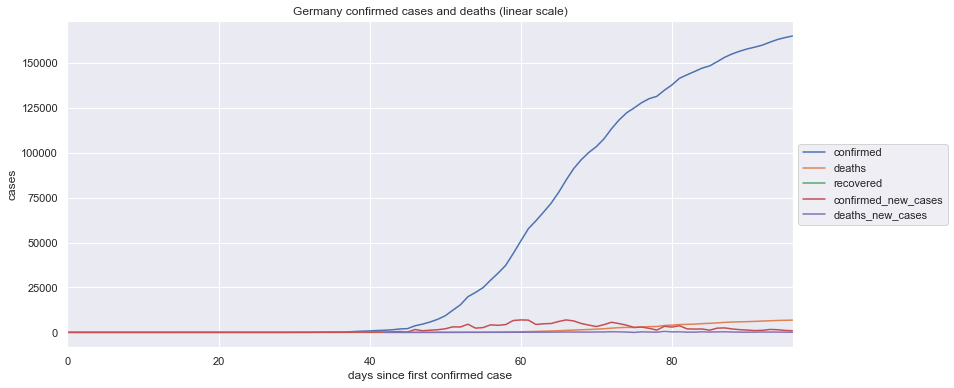

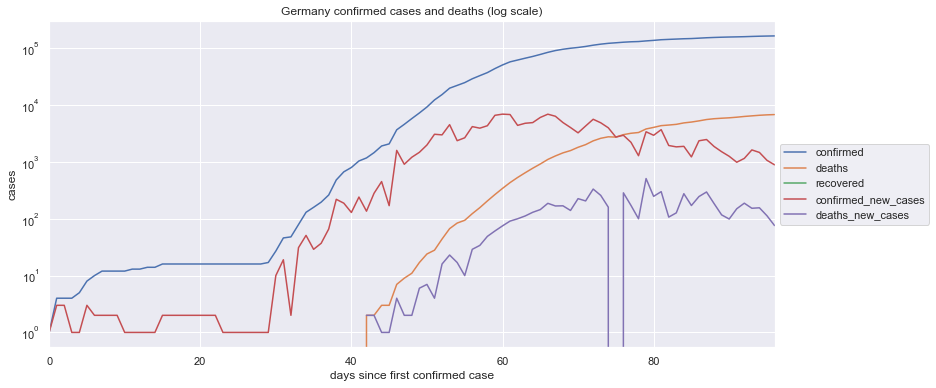

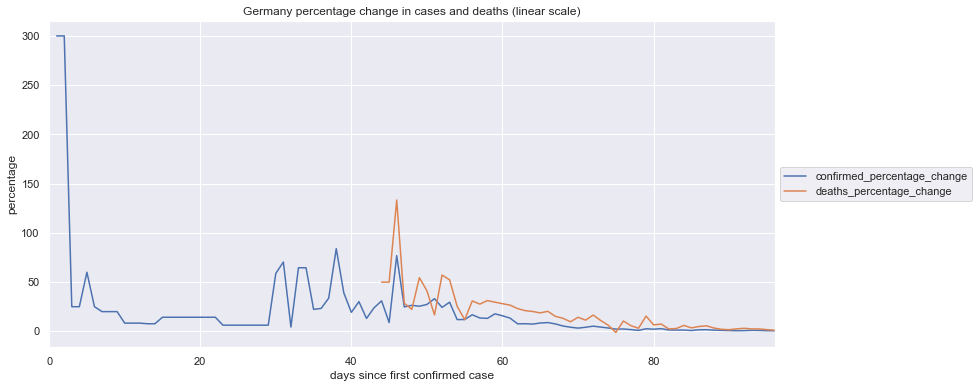

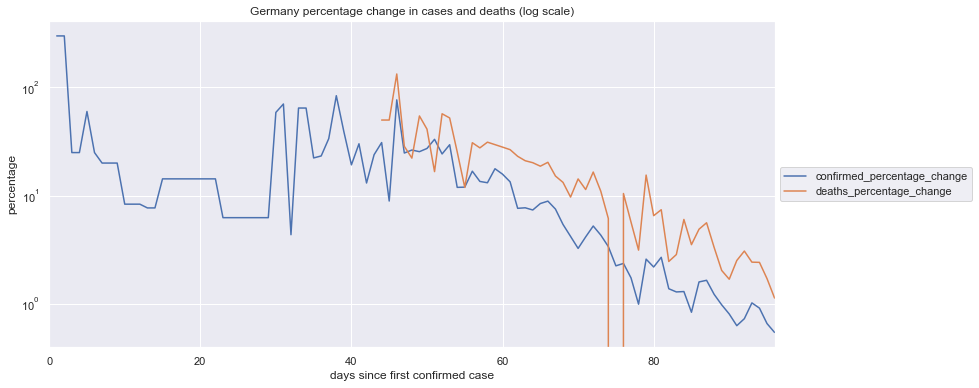

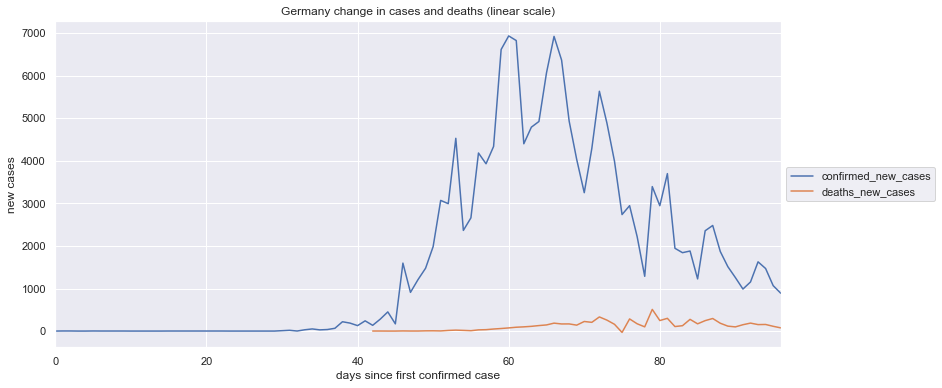

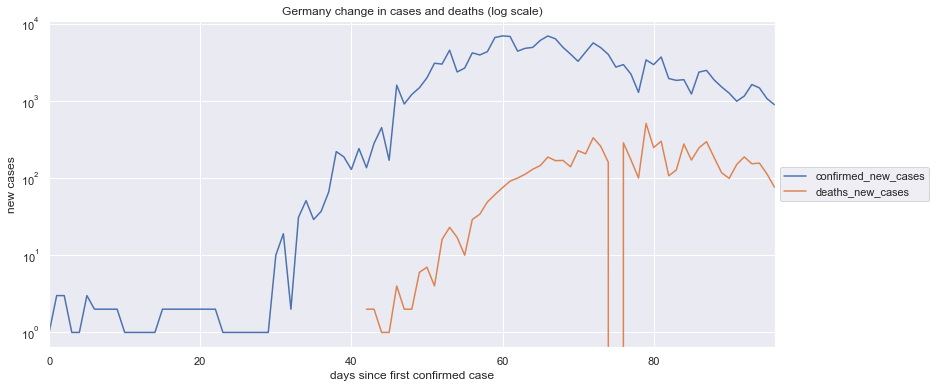

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
88     201505   27359       NaN                     1.048572   
89     203591   27682       NaN                     1.035210   
90     205463   27967       NaN                     0.919491   
91     207428   28236       NaN                     0.956377   
92     209328   28710       NaN                     0.915980   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
88                                       33700.132513                 
89                                       33270.681587                 
90                                       29551.565292                 
91                                       30737.047654                 
92                                       29438.755172                 

    deaths_percentage_change  \
88                  1.416021   
89                  1.180599   
90                  1.029550   
91                  0.961848   
92                  1.678708   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
88                                       45509.590922           
89                                       37943.337049           
90                                       33088.769459           
91                                       30912.890700           
92                                       53952.104427           

    confirmed_new_cases  deaths_new_cases  
88               2091.0             382.0  
89               2086.0             323.0  
90               1872.0             285.0  
91               1965.0             269.0  
92               1900.0             474.0

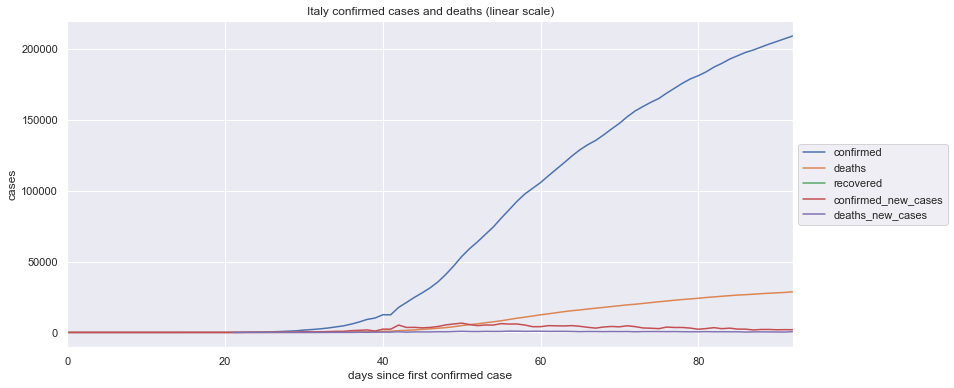

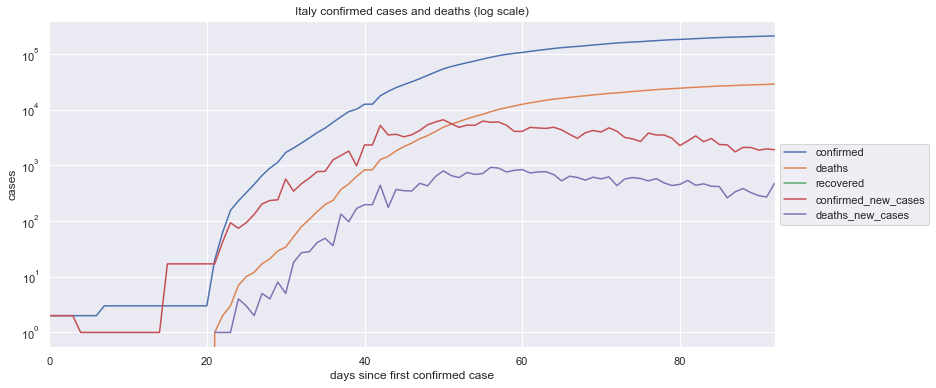

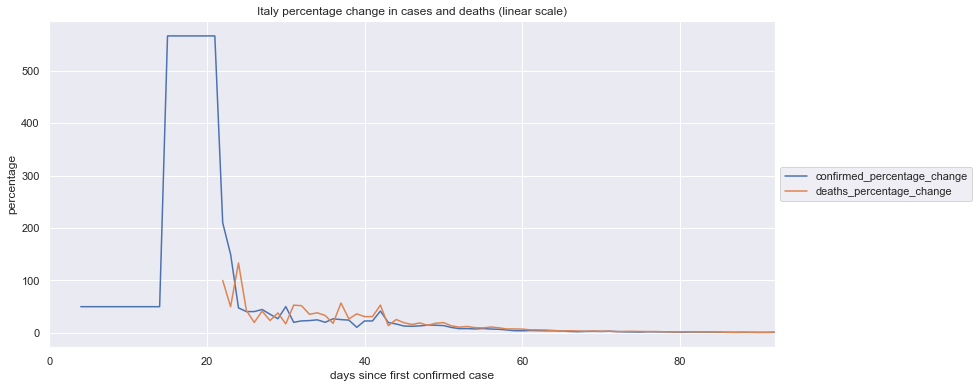

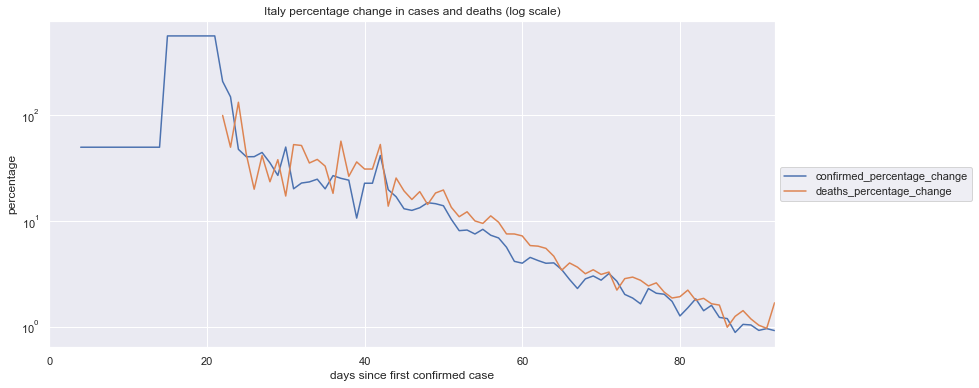

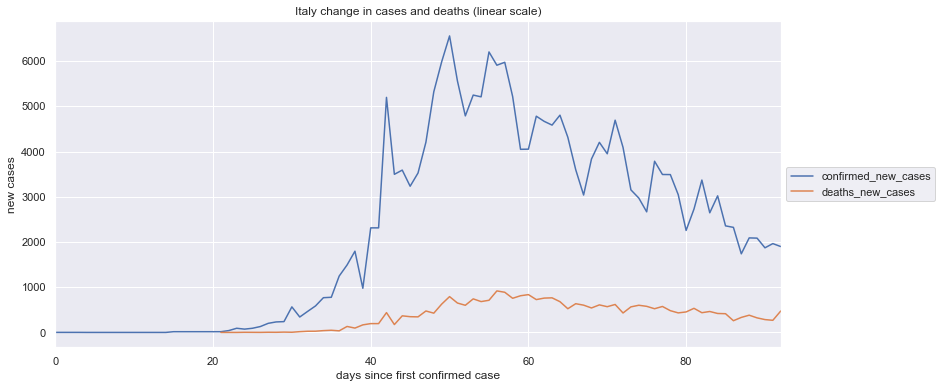

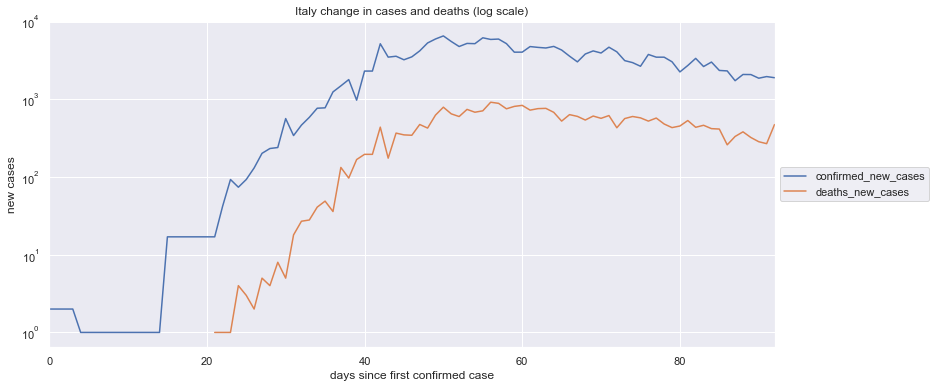

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
97     1012582   58355       NaN                     2.467625   
98     1039909   60967       NaN                     2.698744   
99     1069424   62996       NaN                     2.838229   
100    1103461   64943       NaN                     3.182741   
101    1132539   66369       NaN                     2.635163   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
97                                       276304.017909                 
98                                       302182.789087                 
99                                       317801.119092                 
100                                      356376.714633                 
101                                      295063.517467                 

     deaths_percentage_change  \
97                   3.725626   
98                   4.476052   
99                   3.328030   
100                  3.090672   
101                  2.195772   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
97                                       417164.401896           
98                                       501190.777308           
99                                       372644.909790           
100                                      346067.606043           
101                                      245864.117387           

     confirmed_new_cases  deaths_new_cases  
97               24385.0            2096.0  
98               27327.0            2612.0  
99               29515.0            2029.0  
100              34037.0            1947.0  
101              29078.0            1426.0

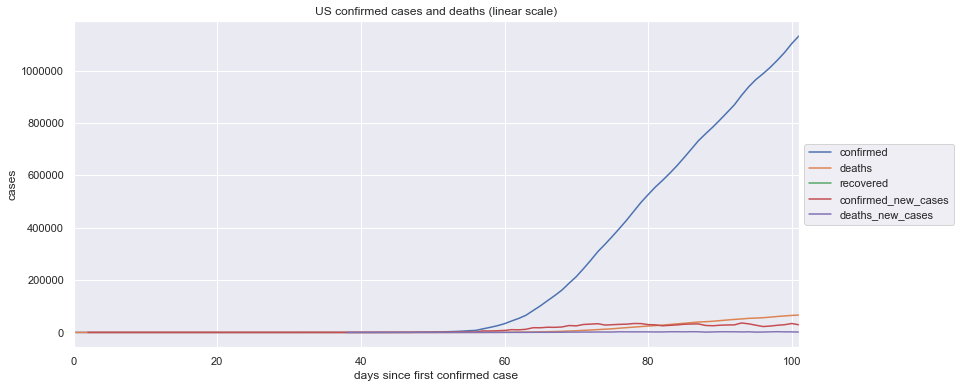

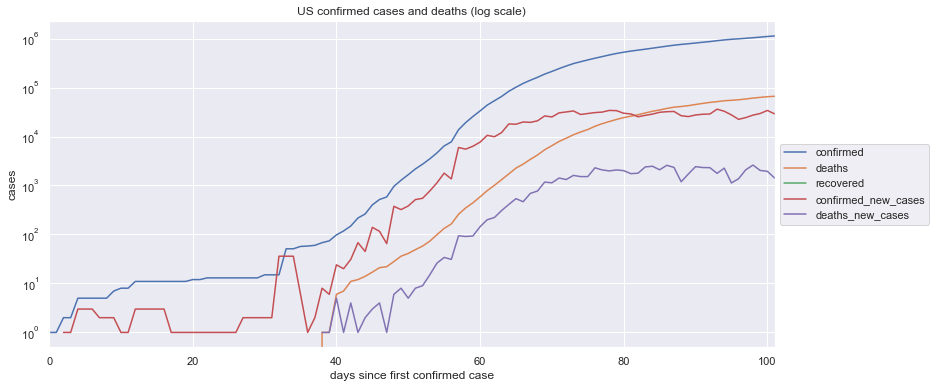

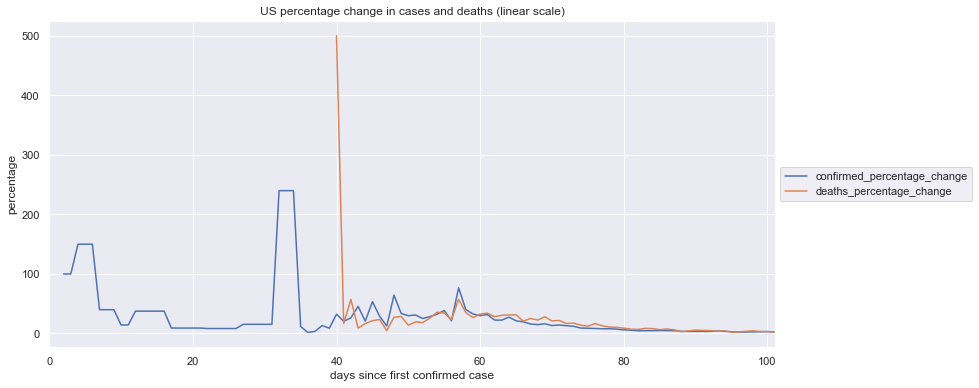

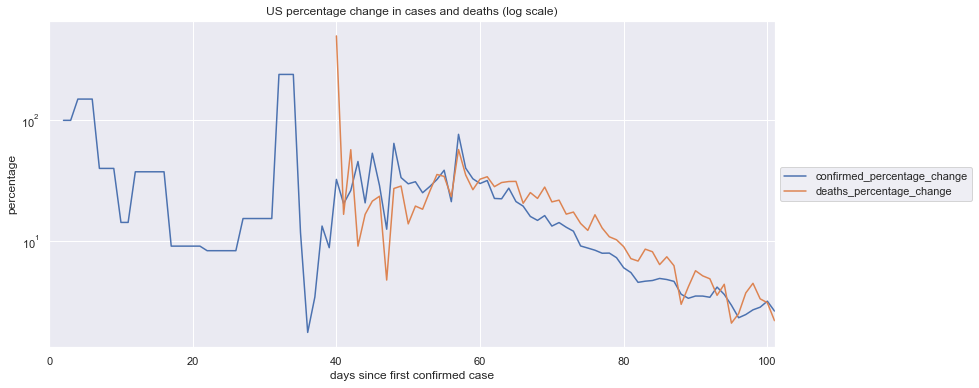

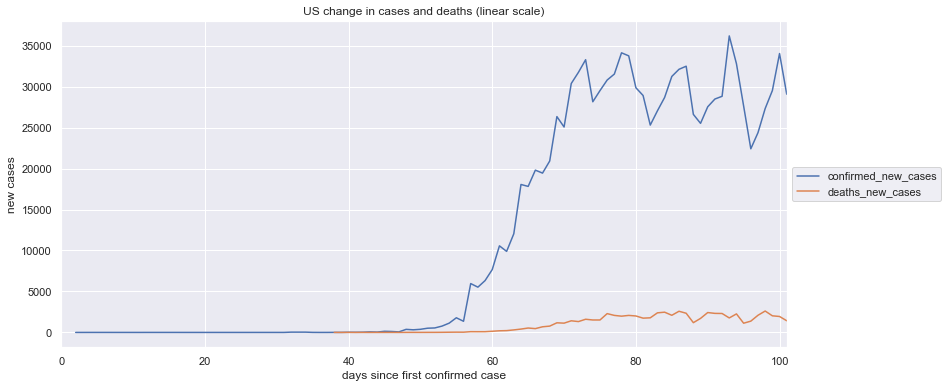

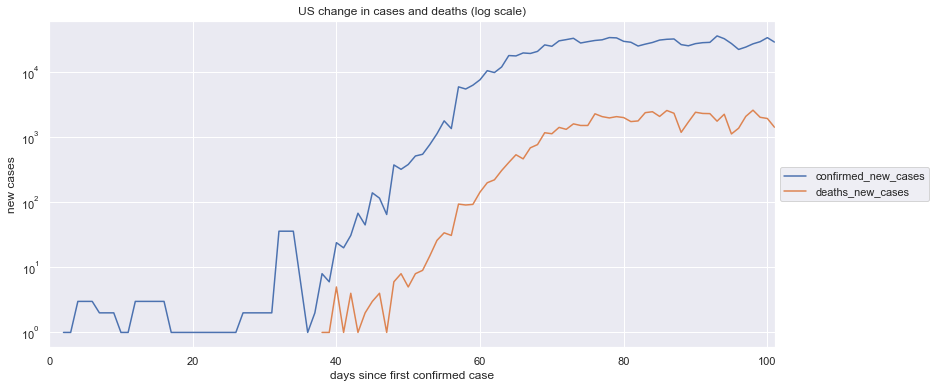

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [20]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland]

In [21]:
#South_Korea

In [22]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
97                   10761                 246                   NaN   
98                   10765                 247                   NaN   
99                   10774                 248                   NaN   
100                  10780                 250                   NaN   
101                  10793                 250                   NaN   

     confirmed_percentage_change_South_Korea  \
97                                  0.083705   
98                                  0.037171   
99                                  0.083604   
100                                 0.055690   
101                                 0.120594   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
97                                          243.765592                             
98                                          108.249652                             
99                                          243.471217                             
100                                         162.178556                             
101                                         351.191295                             

     deaths_percentage_change_South_Korea  \
97                               0.819672   
98                               0.406504   
99                               0.404858   
100                              0.806452   
101                                   NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
97                                         2387.037930                       
98                                         1183.815559                       
99                                         1179.022783                       
100                                        2348.537318                       
101                                                NaN                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
97                               9.0                           2.0   
98                               4.0                           1.0   
99                               9.0                           1.0   
100                              6.0                           2.0   
101                             13.0                           NaN   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
97                NaN            NaN              NaN   
98                NaN            NaN              NaN   
99                NaN            NaN              NaN   
100               NaN            NaN              NaN   
101               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
97                                  NaN   
98                                  NaN   
99                                  NaN   
100                                 NaN   
101                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
97                                                 NaN                        
98                                                 NaN                        
99                                                 NaN                        
100                                                NaN                        
101                                                NaN                        

     deaths_percentage_change_Sweden  \
97                               NaN   
98                               NaN   
99                               NaN   
100                              NaN   
101                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
97                                                 NaN                  
98                                                 NaN                  
99                                                 NaN                  
100    

# comparisons: confirmed cases

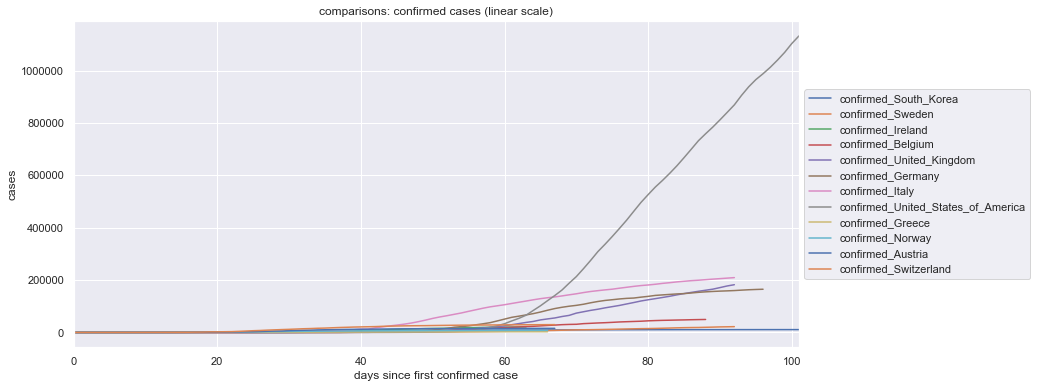

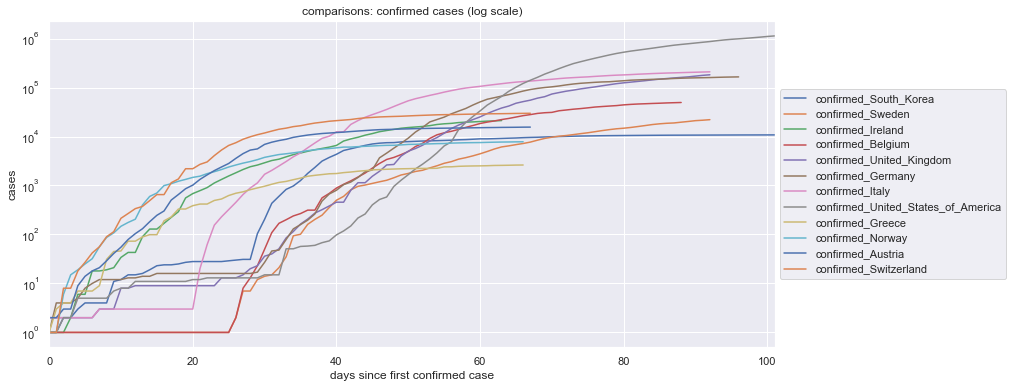

In [23]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

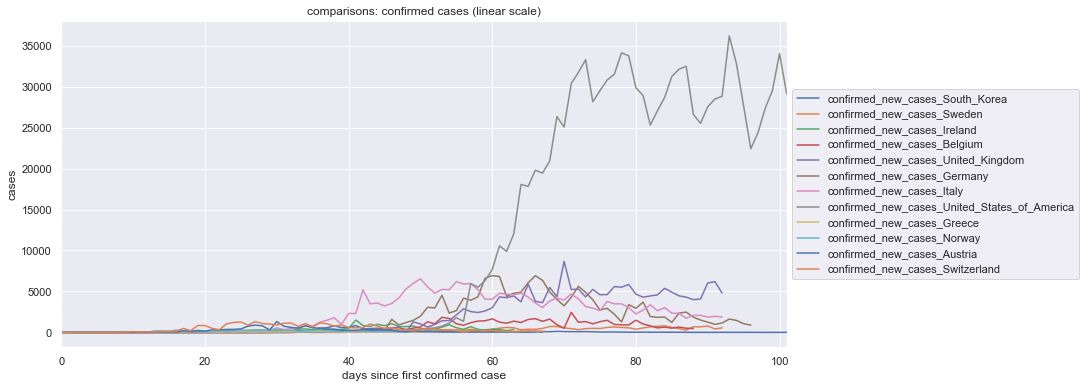

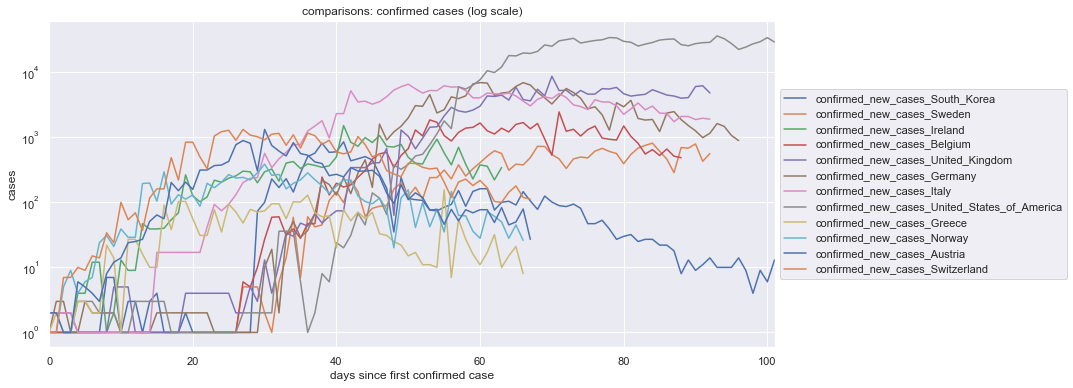

In [24]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

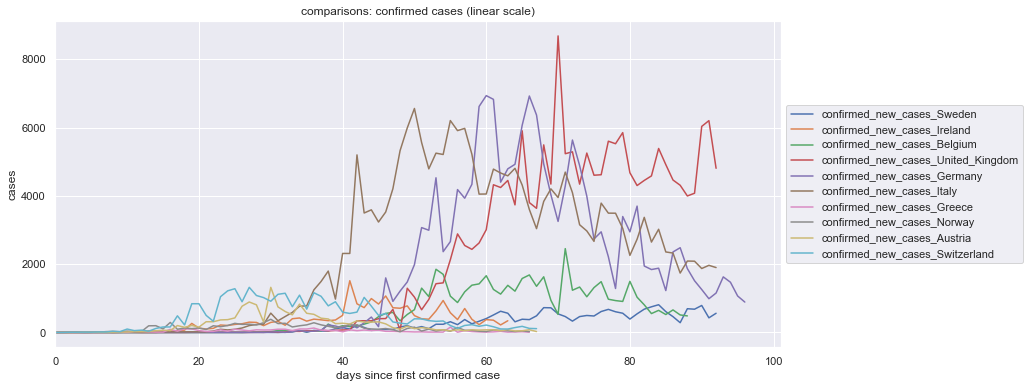

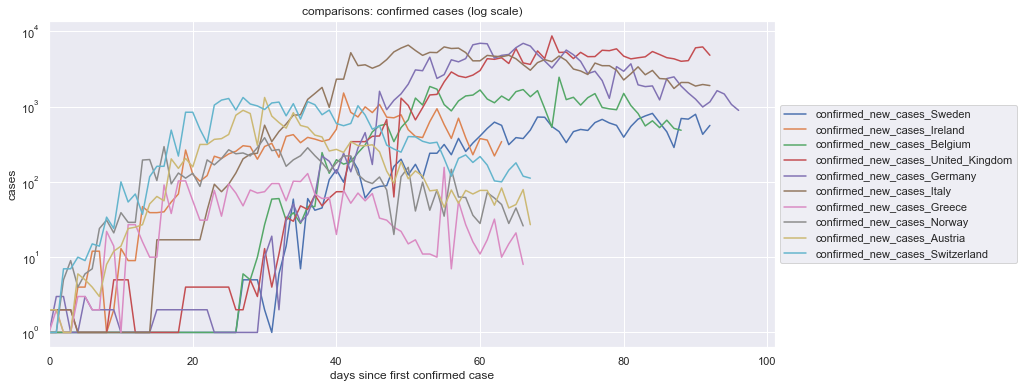

In [25]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
97                  246            NaN             NaN             NaN   
98                  247            NaN             NaN             NaN   
99                  248            NaN             NaN             NaN   
100                 250            NaN             NaN             NaN   
101                 250            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
97                     NaN             NaN           NaN   
98                     NaN             NaN           NaN   
99                     NaN             NaN           NaN   
100                    NaN             NaN           NaN   
101                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
97                             58355            NaN            NaN   
98                             60967            NaN            NaN   
99                             62996            NaN            NaN   
100                            64943            NaN            NaN   
101                            66369            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
97              NaN                 NaN  
98              NaN                 NaN  
99              NaN                 NaN  
100             NaN                 NaN  
101             NaN                 NaN

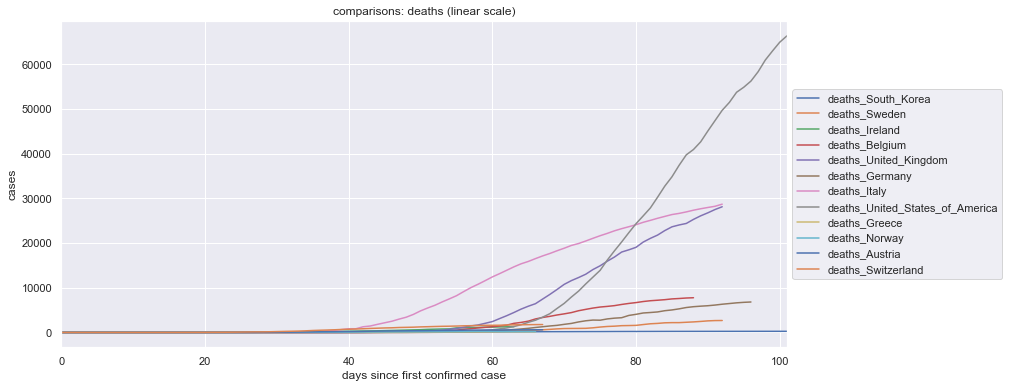

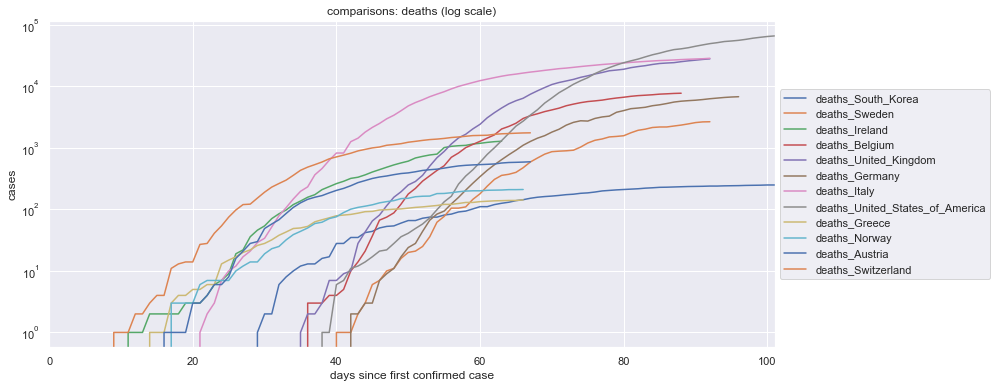

In [26]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
97             NaN             NaN             NaN                    NaN   
98             NaN             NaN             NaN                    NaN   
99             NaN             NaN             NaN                    NaN   
100            NaN             NaN             NaN                    NaN   
101            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
97              NaN           NaN            NaN            NaN   
98              NaN           NaN            NaN            NaN   
99              NaN           NaN            NaN            NaN   
100             NaN           NaN            NaN            NaN   
101             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
97              NaN                 NaN  
98              NaN                 NaN  
99              NaN                 NaN  
100             NaN                 NaN  
101             NaN                 NaN

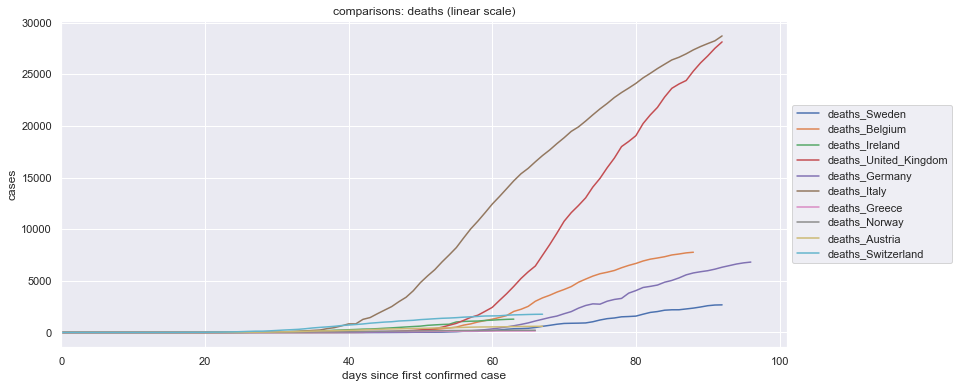

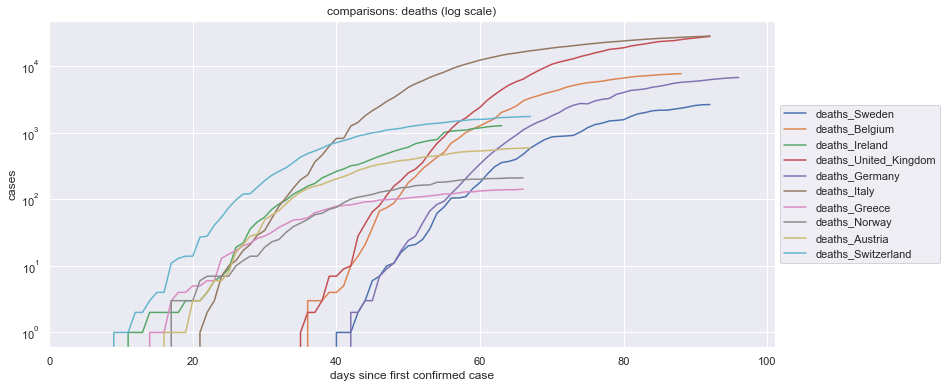

In [27]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
97                            2.0                      NaN   
98                            1.0                      NaN   
99                            1.0                      NaN   
100                           2.0                      NaN   
101                           NaN                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
97                        NaN                       NaN   
98                        NaN                       NaN   
99                        NaN                       NaN   
100                       NaN                       NaN   
101                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
97                               NaN                       NaN   
98                               NaN                       NaN   
99                               NaN                       NaN   
100                              NaN                       NaN   
101                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
97                      NaN                                     2096.0   
98                      NaN                                     2612.0   
99                      NaN                                     2029.0   
100                     NaN                                     1947.0   
101                     NaN                                     1426.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
97                       NaN                      NaN   
98                       NaN                      NaN   
99                       NaN                      NaN   
100                      NaN                      NaN   
101                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
97                        NaN                           NaN  
98                        NaN                           NaN  
99                        NaN                           NaN  
100                       NaN                           NaN  
101                       NaN                           NaN

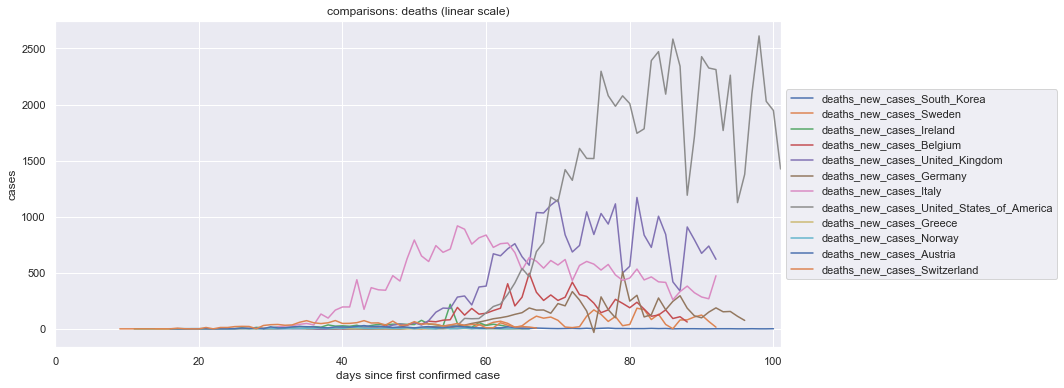

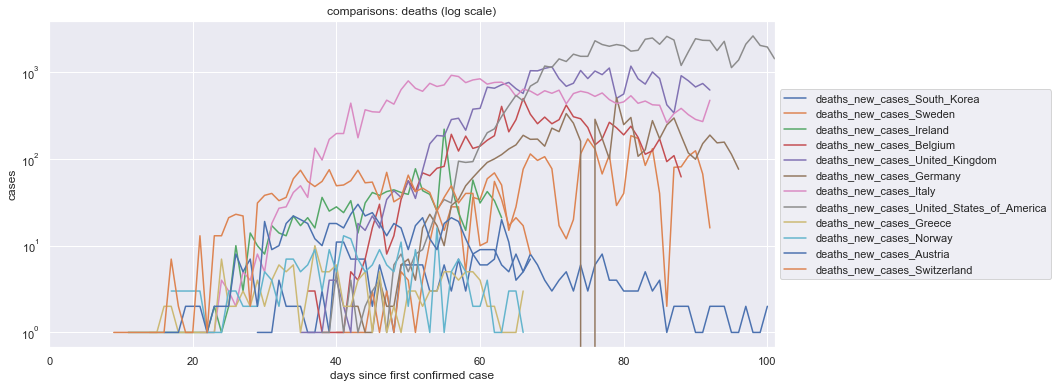

In [28]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
97                       NaN                       NaN   
98                       NaN                       NaN   
99                       NaN                       NaN   
100                      NaN                       NaN   
101                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
97                        NaN                              NaN   
98                        NaN                              NaN   
99                        NaN                              NaN   
100                       NaN                              NaN   
101                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
97                        NaN                     NaN   
98                        NaN                     NaN   
99                        NaN                     NaN   
100                       NaN                     NaN   
101                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
97                       NaN                      NaN   
98                       NaN                      NaN   
99                       NaN                      NaN   
100                      NaN                      NaN   
101                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
97                        NaN                           NaN  
98                        NaN                           NaN  
99                        NaN                           NaN  
100                       NaN                           NaN  
101                       NaN                           NaN

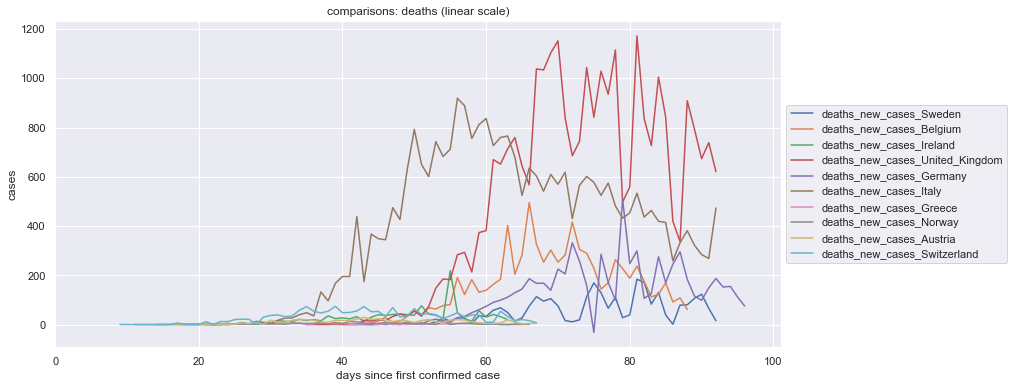

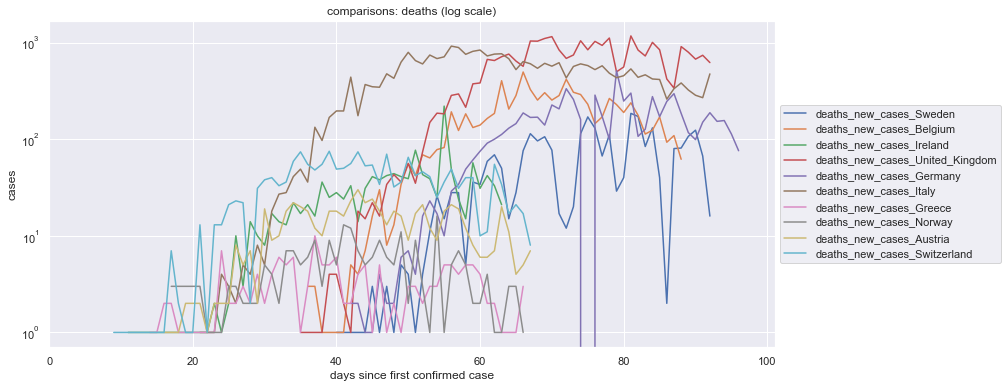

In [29]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
97                                  0.083705   
98                                  0.037171   
99                                  0.083604   
100                                 0.055690   
101                                 0.120594   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
97                                  NaN                                  NaN   
98                                  NaN                                  NaN   
99                                  NaN                                  NaN   
100                                 NaN                                  NaN   
101                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
97                                   NaN   
98                                   NaN   
99                                   NaN   
100                                  NaN   
101                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
97                                          NaN   
98                                          NaN   
99                                          NaN   
100                                         NaN   
101                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
97                                   NaN                                NaN   
98                                   NaN                                NaN   
99                                   NaN                                NaN   
100                                  NaN                                NaN   
101                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
97                                            2.467625      
98                                            2.698744      
99                                            2.838229      
100                                           3.182741      
101                                           2.635163      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
97                                  NaN                                 NaN   
98                                  NaN                                 NaN   
99                                  NaN                                 NaN   
100                                 NaN                                 NaN   
101                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
97                                   NaN   
98                                   NaN   
99                                   NaN   
100                                  NaN   
101                                  NaN   

     confirmed_percentage_change_Switzerland  
97                                       NaN  
98                                       NaN  
99                                       NaN  
100                                      NaN  
101                                      NaN

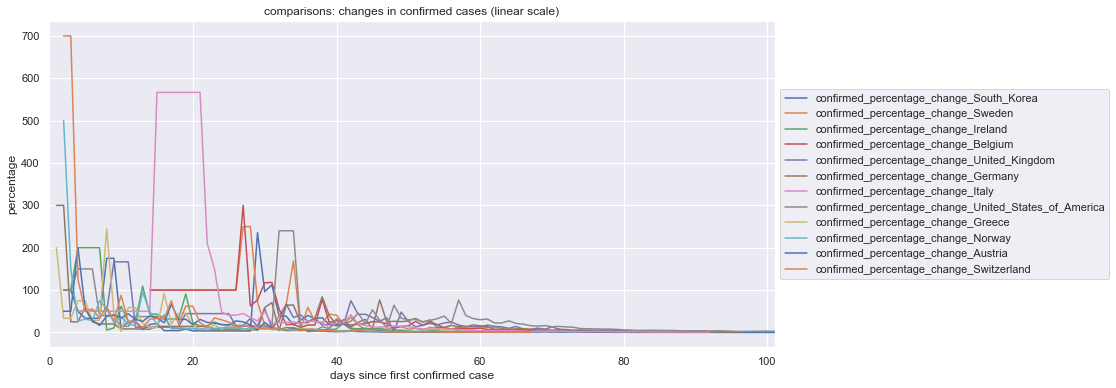

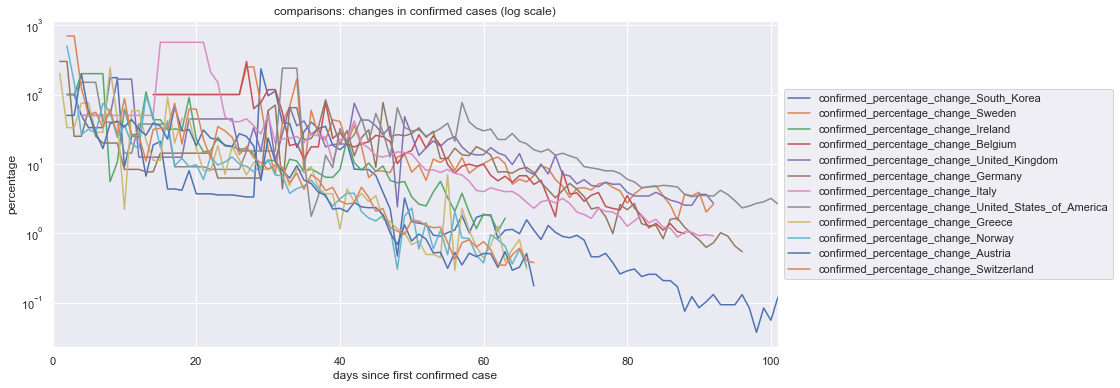

In [30]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
97                               0.819672                              NaN   
98                               0.406504                              NaN   
99                               0.404858                              NaN   
100                              0.806452                              NaN   
101                                   NaN                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
97                                NaN                               NaN   
98                                NaN                               NaN   
99                                NaN                               NaN   
100                               NaN                               NaN   
101                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
97                                       NaN   
98                                       NaN   
99                                       NaN   
100                                      NaN   
101                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
97                                NaN                             NaN   
98                                NaN                             NaN   
99                                NaN                             NaN   
100                               NaN                             NaN   
101                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
97                                            3.725626   
98                                            4.476052   
99                                            3.328030   
100                                           3.090672   
101                                           2.195772   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
97                               NaN                              NaN   
98                               NaN                              NaN   
99                               NaN                              NaN   
100                              NaN                              NaN   
101                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
97                                NaN                                   NaN  
98                                NaN                                   NaN  
99                                NaN                                   NaN  
100                               NaN                                   NaN  
101                               NaN                                   NaN

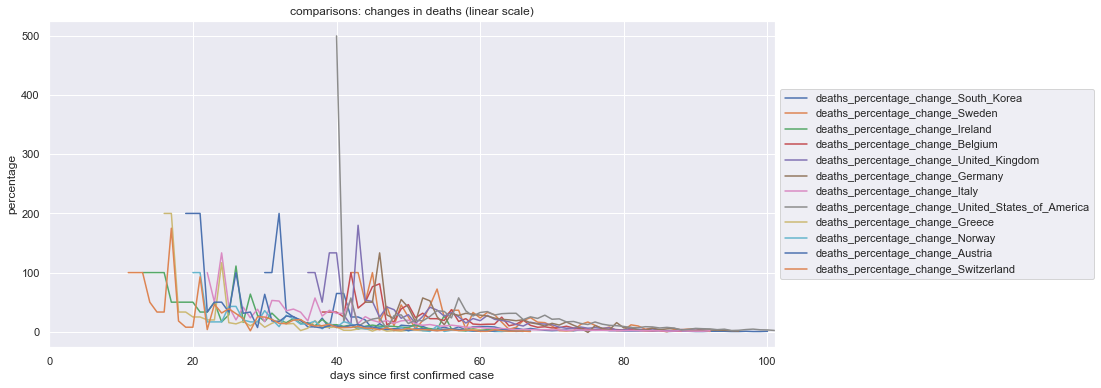

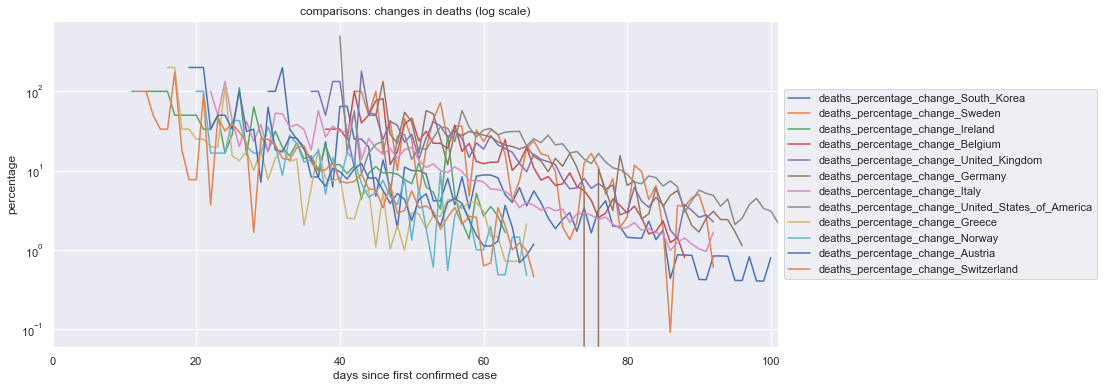

In [31]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
97                               NaN                               NaN   
98                               NaN                               NaN   
99                               NaN                               NaN   
100                              NaN                               NaN   
101                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
97                                NaN   
98                                NaN   
99                                NaN   
100                               NaN   
101                               NaN   

     deaths_percentage_change_United_Kingdom  \
97                                       NaN   
98                                       NaN   
99                                       NaN   
100                                      NaN   
101                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
97                                NaN                             NaN   
98                                NaN                             NaN   
99                                NaN                             NaN   
100                               NaN                             NaN   
101                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
97                               NaN                              NaN   
98                               NaN                              NaN   
99                               NaN                              NaN   
100                              NaN                              NaN   
101                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
97                                NaN                                   NaN  
98                                NaN                                   NaN  
99                                NaN                                   NaN  
100                               NaN                                   NaN  
101                               NaN                                   NaN

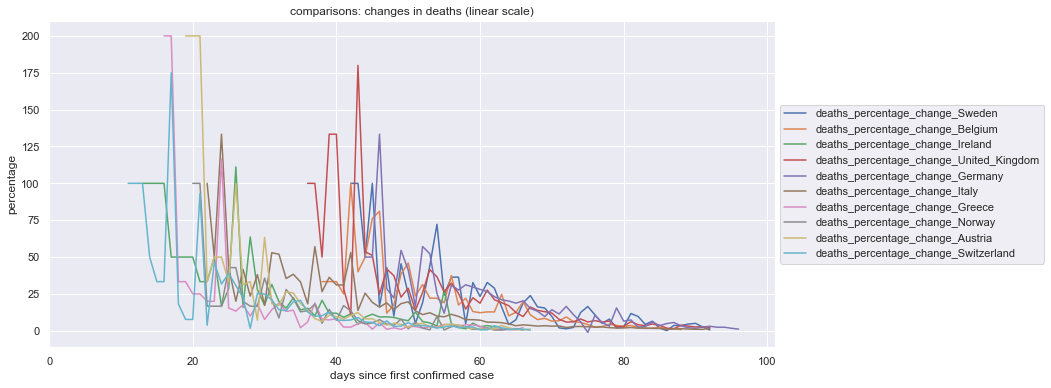

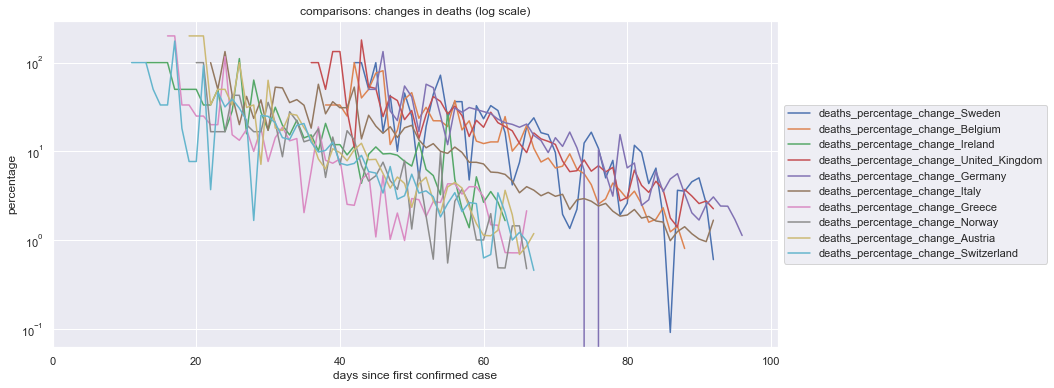

In [32]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');